In [1]:
import yfinance as yf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.offsets import BDay

In [2]:
df = pd.read_excel("Calculated_VIX.xlsx")

In [3]:
df

Date        VIX  Call_contribution  Put_contribution
0     2010-01-04  11.744340           7.403955          9.755545
1     2010-01-05  10.426754           6.558768          8.740827
2     2010-01-06   9.813317           6.436661          8.065107
3     2010-01-07   9.430135           6.199992          7.769425
4     2010-01-08   7.851250           5.176900          6.552607
...          ...        ...                ...               ...
3769  2024-12-24  14.299359           6.689822         12.731306
3770  2024-12-26  14.716715           6.965985         13.058975
3771  2024-12-27  15.930679           7.733458         14.029382
3772  2024-12-30  17.390575           8.539962         15.255390
3773  2024-12-31  17.344585           8.572082         15.184891

[3774 rows x 4 columns]

In [4]:
# Step 1: Create a full range of trading dates
start_date = '2010-08-30'
end_date = '2024-12-27'
full_trading_dates = pd.date_range(start=start_date, end=end_date, freq=BDay())

In [5]:
# Step 2: Ensure 'Date' is a datetime column in your dataframe
df['Date'] = pd.to_datetime(df['Date'])

In [6]:
# Step 3: Reindex your dataframe to include all trading dates
df = df.set_index('Date').reindex(full_trading_dates).reset_index()
df = df.rename(columns={'index': 'Date'})

In [7]:
# Step 4: Fetch VIX data from Yahoo Finance
vix_data = yf.download('^VIX', start=start_date, end=end_date, progress=False)
vix_data = vix_data[['Close']].rename(columns={'Close': 'VIX_yfinance'}).reset_index()
vix_data['Date'] = pd.to_datetime(vix_data['Date'])

YF.download() has changed argument auto_adjust default to True


In [8]:
# Flatten column indices for both dataframes if needed
if isinstance(df.columns, pd.MultiIndex):
    df.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in df.columns]

if isinstance(vix_data.columns, pd.MultiIndex):
    vix_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in vix_data.columns]


In [9]:
# Rename 'Date_' back to 'Date' in vix_data
vix_data.rename(columns={'Date_': 'Date'}, inplace=True)

In [10]:
# Step 5: Merge the dataframe with the VIX data
merged_df = pd.merge(df, vix_data, on='Date', how='outer').sort_values('Date')

In [11]:
merged_df

Date        VIX  Call_contribution  Put_contribution  \
0    2010-08-30  25.690314          19.245737         20.745455   
1    2010-08-31  26.007875          20.700487         20.272551   
2    2010-09-01  23.393372          16.551596         20.324195   
3    2010-09-02  22.017113          16.938051         18.260835   
4    2010-09-03  19.066575          13.686595         15.936639   
...         ...        ...                ...               ...   
3735 2024-12-23  16.778378           7.837021         14.933949   
3736 2024-12-24  14.299359           6.689822         12.731306   
3737 2024-12-25        NaN                NaN               NaN   
3738 2024-12-26  14.716715           6.965985         13.058975   
3739 2024-12-27  15.930679           7.733458         14.029382   

      VIX_yfinance_^VIX  
0             27.209999  
1             26.049999  
2             23.889999  
3             23.190001  
4             21.309999  
...                 ...  
3735          16.780001  
3736          14.270000  
3737                NaN  
3738          14.730000  
3739                NaN  

[3740 rows x 5 columns]

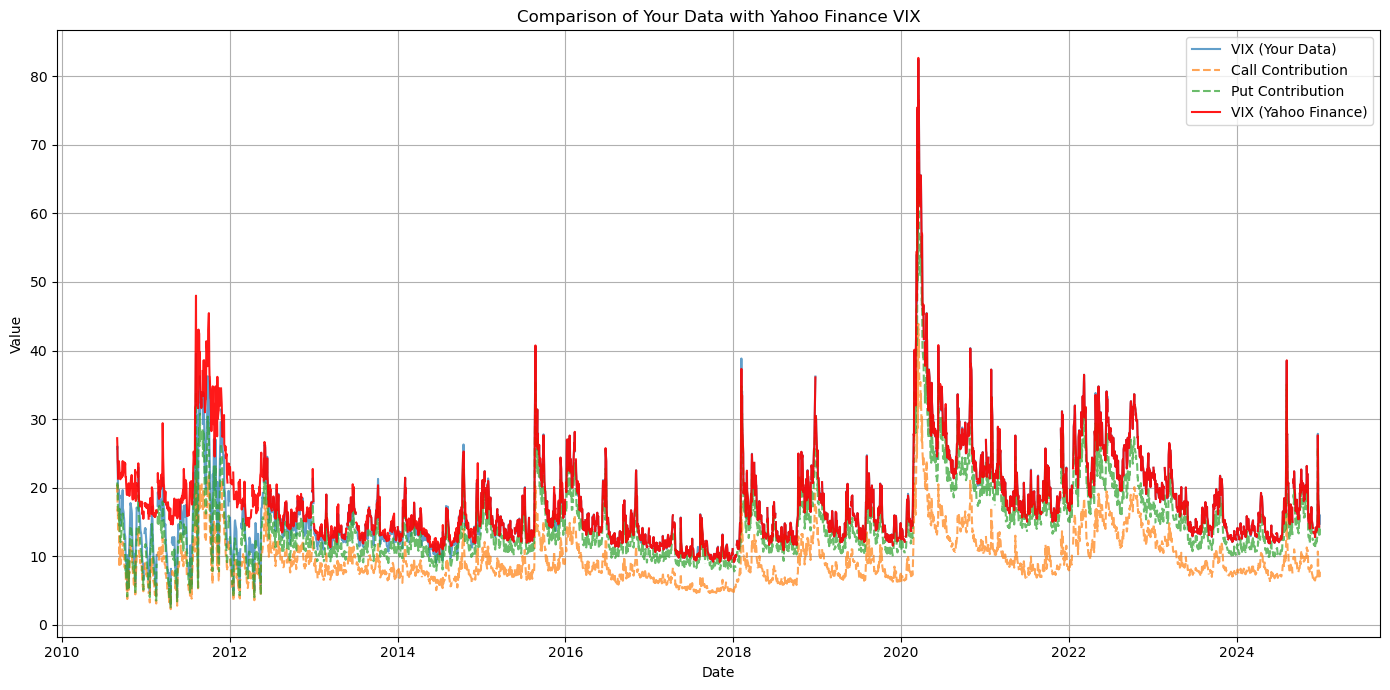

In [12]:
# Step 6: Plot the data
plt.figure(figsize=(14, 7))

# Plot your dataframe's VIX
plt.plot(merged_df['Date'], merged_df['VIX'], label='VIX (Your Data)', alpha=0.7)

# Plot the Call and Put contributions
plt.plot(merged_df['Date'], merged_df['Call_contribution'], label='Call Contribution', linestyle='--', alpha=0.7)
plt.plot(merged_df['Date'], merged_df['Put_contribution'], label='Put Contribution', linestyle='--', alpha=0.7)

# Plot Yahoo Finance VIX
plt.plot(merged_df['Date'], merged_df['VIX_yfinance_^VIX'], label='VIX (Yahoo Finance)', alpha=0.9, color='red')

# Customize the plot
plt.title('Comparison of Your Data with Yahoo Finance VIX')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

In [28]:
merged_df

Date       VIX  Call_contribution  Put_contribution  \
0    2010-08-30  6.677564           3.851051          4.342858   
1    2010-08-31  6.807527           4.363494          4.131135   
2    2010-09-01  5.472499           2.739553          4.130729   
3    2010-09-02  4.861301           2.877128          3.344052   
4    2010-09-03  3.653677           1.882676          2.552574   
...         ...       ...                ...               ...   
3735 2024-12-23  2.815418           0.614195          2.230710   
3736 2024-12-24  2.045084           0.447514          1.621370   
3737 2024-12-25       NaN                NaN               NaN   
3738 2024-12-26  2.167638           0.485562          1.706844   
3739 2024-12-27  2.540088           0.598305          1.970214   

      VIX_yfinance_^VIX  
0             27.209999  
1             26.049999  
2             23.889999  
3             23.190001  
4             21.309999  
...                 ...  
3735          16.780001  
3736          14.270000  
3737                NaN  
3738          14.730000  
3739                NaN  

[3740 rows x 5 columns]

In [46]:
correlation = merged_df[['VIX', 'VIX_yfinance_^VIX']].corr()
print(correlation)

                        VIX  VIX_yfinance_^VIX
VIX                1.000000           0.884328
VIX_yfinance_^VIX  0.884328           1.000000


In [48]:
# Normalize your VIX and the Yahoo Finance VIX
merged_df['VIX_normalized'] = (merged_df['VIX'] - merged_df['VIX'].min()) / (merged_df['VIX'].max() - merged_df['VIX'].min())
merged_df['VIX_yfinance_normalized'] = (merged_df['VIX_yfinance_^VIX'] - merged_df['VIX_yfinance_^VIX'].min()) / (merged_df['VIX_yfinance_^VIX'].max() - merged_df['VIX_yfinance_^VIX'].min())

In [49]:
# Standardize your VIX and the Yahoo Finance VIX
merged_df['VIX_standardized'] = (merged_df['VIX'] - merged_df['VIX'].mean()) / merged_df['VIX'].std()
merged_df['VIX_yfinance_standardized'] = (merged_df['VIX_yfinance_^VIX'] - merged_df['VIX_yfinance_^VIX'].mean()) / merged_df['VIX_yfinance_^VIX'].std()

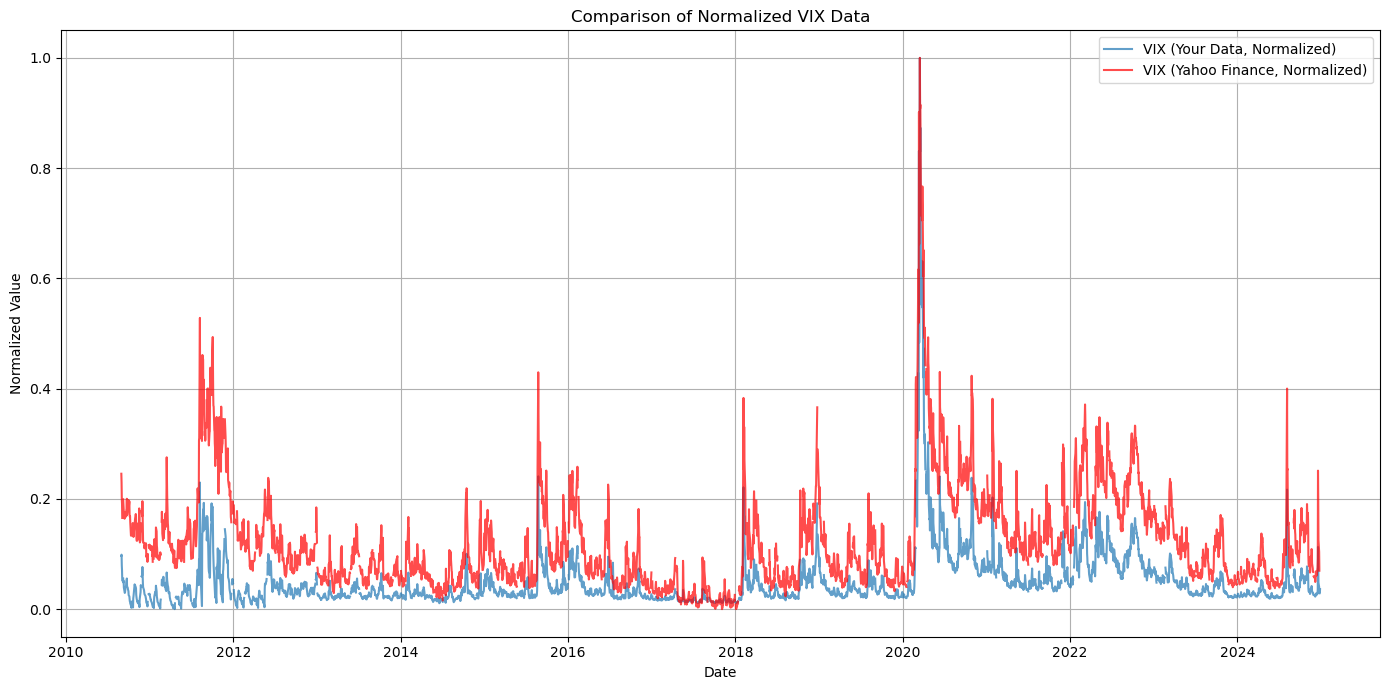

In [50]:
plt.figure(figsize=(14, 7))

# Plot normalized VIX data
plt.plot(merged_df['Date'], merged_df['VIX_normalized'], label='VIX (Your Data, Normalized)', alpha=0.7)
plt.plot(merged_df['Date'], merged_df['VIX_yfinance_normalized'], label='VIX (Yahoo Finance, Normalized)', alpha=0.7, color='red')

# Customize the plot
plt.title('Comparison of Normalized VIX Data')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [51]:
# Calculate the ratio of Put contribution to Call contribution
merged_df['Put_Call_Ratio'] = merged_df['Put_contribution'] / merged_df['Call_contribution']

In [71]:
# Calculate the ratio of Put contribution to Call contribution
merged_df['Put_Call_Diff'] = merged_df['Put_contribution'] - merged_df['Call_contribution']

In [72]:
merged_df

Date       VIX  Call_contribution  Put_contribution  \
0    2010-08-30  6.677564           3.851051          4.342858   
1    2010-08-31  6.807527           4.363494          4.131135   
2    2010-09-01  5.472499           2.739553          4.130729   
3    2010-09-02  4.861301           2.877128          3.344052   
4    2010-09-03  3.653677           1.882676          2.552574   
...         ...       ...                ...               ...   
3735 2024-12-23  2.815418           0.614195          2.230710   
3736 2024-12-24  2.045084           0.447514          1.621370   
3737 2024-12-25       NaN                NaN               NaN   
3738 2024-12-26  2.167638           0.485562          1.706844   
3739 2024-12-27  2.540088           0.598305          1.970214   

      VIX_yfinance_^VIX  VIX_normalized  VIX_yfinance_normalized  \
0             27.209999        0.096905                 0.245683   
1             26.049999        0.098816                 0.229912   
2             23.889999        0.079182                 0.200544   
3             23.190001        0.070193                 0.191027   
4             21.309999        0.052432                 0.165466   
...                 ...             ...                      ...   
3735          16.780001        0.040104                 0.103875   
3736          14.270000        0.028774                 0.069748   
3737                NaN             NaN                      NaN   
3738          14.730000        0.030576                 0.076003   
3739                NaN        0.036054                      NaN   

      VIX_standardized  VIX_yfinance_standardized  Put_Call_Ratio  \
0             0.857018                   1.313823        1.127707   
1             0.891217                   1.145948        0.946749   
2             0.539904                   0.833353        1.507811   
3             0.379067                   0.732049        1.162288   
4             0.061280                   0.459975        1.355822   
...                ...                        ...             ...   
3735         -0.159309                  -0.195606        3.631925   
3736         -0.362022                  -0.558853        3.623064   
3737               NaN                        NaN             NaN   
3738         -0.329772                  -0.492282        3.515195   
3739         -0.231762                        NaN        3.292994   

        SPX_^GSPC  Put_Call_Diff  
0     1048.920044       0.491806  
1     1049.329956      -0.232360  
2     1080.290039       1.391176  
3     1090.099976       0.466924  
4     1104.510010       0.669898  
...           ...            ...  
3735  5974.069824       1.616515  
3736  6040.040039       1.173857  
3737          NaN            NaN  
3738  6037.589844       1.221282  
3739  5970.839844       1.371909  

[3740 rows x 12 columns]

In [55]:
# Fetch SPX data from Yahoo Finance
spx_data = yf.download('^GSPC', start='2010-08-30', end='2024-12-28', progress=False)
spx_data = spx_data[['Close']].rename(columns={'Close': 'SPX'}).reset_index()

# Ensure 'Date' is in datetime format
spx_data['Date'] = pd.to_datetime(spx_data['Date'])
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Flatten column indices for both dataframes if needed
if isinstance(spx_data.columns, pd.MultiIndex):
    spx_data.columns = ['_'.join(col).strip() if isinstance(col, tuple) else col for col in spx_data.columns]

# Rename 'Date_' back to 'Date' in vix_data
spx_data.rename(columns={'Date_': 'Date'}, inplace=True)

# Merge SPX data with your dataframe
merged_df = pd.merge(merged_df, spx_data, on='Date', how='outer').sort_values('Date')

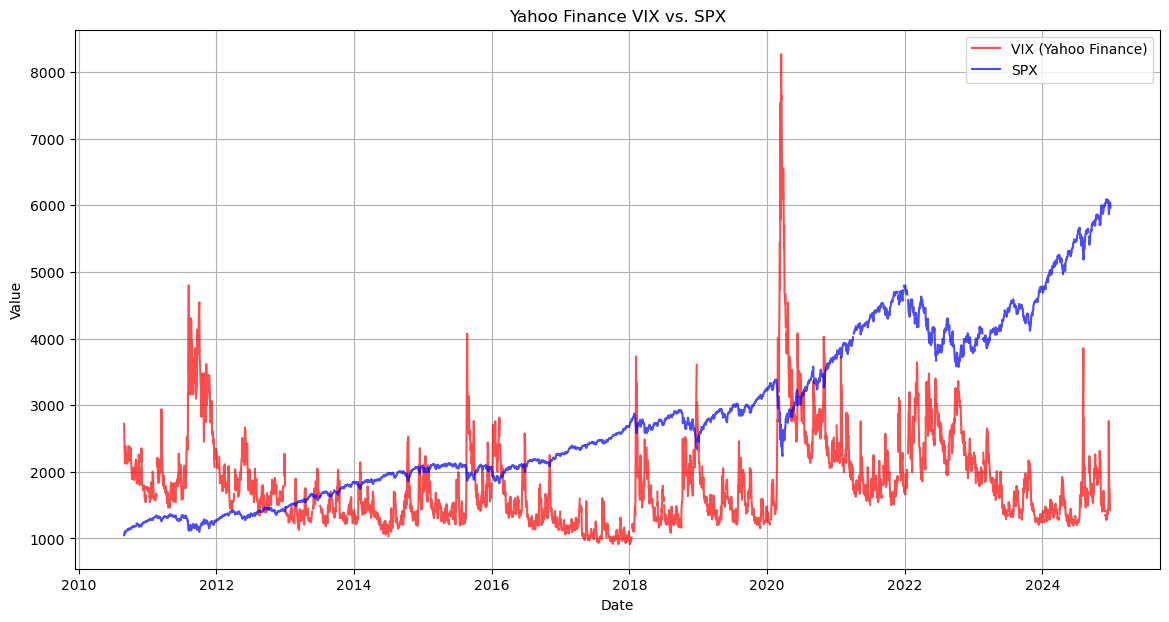

In [64]:
# Plot 1: Yahoo Finance VIX vs. SPX
plt.figure(figsize=(14, 7))
plt.plot(merged_df['Date'], merged_df['VIX_yfinance_^VIX']*100, label='VIX (Yahoo Finance)', color='red', alpha=0.7)
plt.plot(merged_df['Date'], merged_df['SPX_^GSPC'], label='SPX', color='blue', alpha=0.7)
plt.title('Yahoo Finance VIX vs. SPX')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

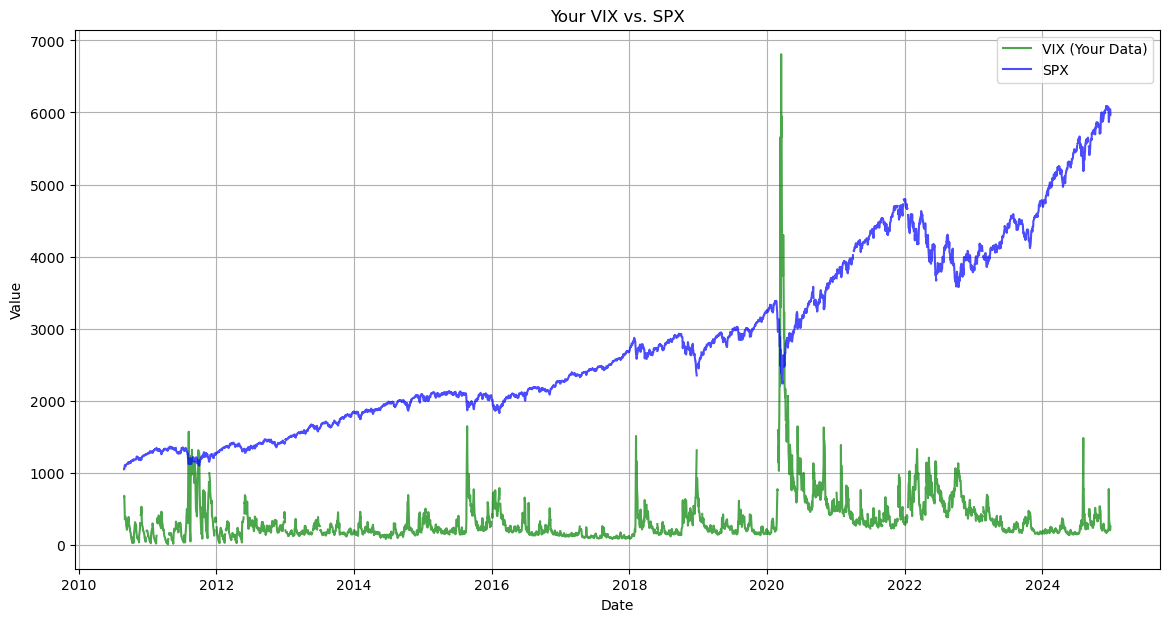

In [66]:
# Plot 2: Your VIX vs. SPX
plt.figure(figsize=(14, 7))
plt.plot(merged_df['Date'], merged_df['VIX']*100, label='VIX (Your Data)', color='green', alpha=0.7)
plt.plot(merged_df['Date'], merged_df['SPX_^GSPC'], label='SPX', color='blue', alpha=0.7)
plt.title('Your VIX vs. SPX')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

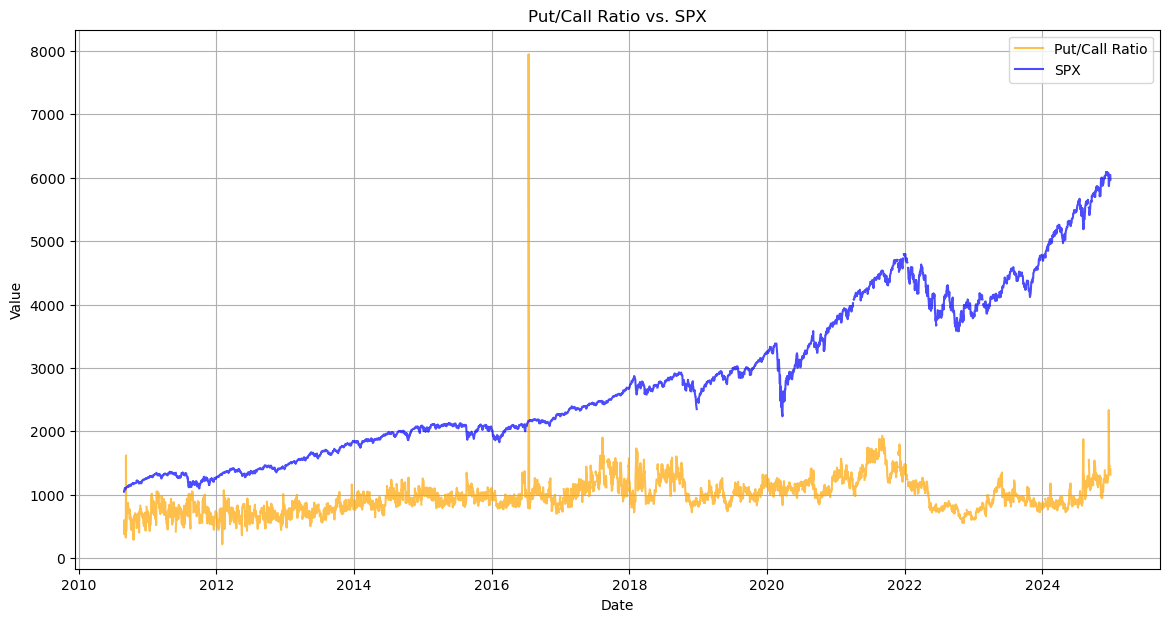

In [70]:
# Plot 3: Put/Call Ratio vs. SPX
plt.figure(figsize=(14, 7))
plt.plot(merged_df['Date'], merged_df['Put_Call_Ratio']*400, label='Put/Call Ratio', color='orange', alpha=0.7)
plt.plot(merged_df['Date'], merged_df['SPX_^GSPC'], label='SPX', color='blue', alpha=0.7)
plt.title('Put/Call Ratio vs. SPX')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

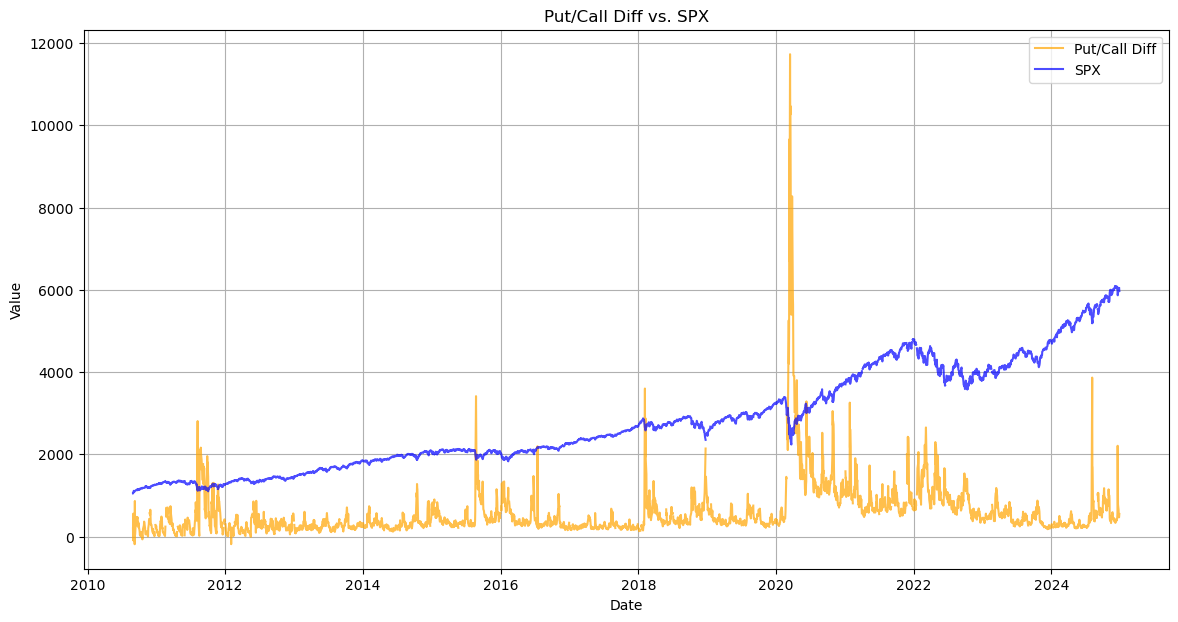

In [76]:
# Plot 4: Put/Call Diff vs. SPX
plt.figure(figsize=(14, 7))
plt.plot(merged_df['Date'], merged_df['Put_Call_Diff']*400, label='Put/Call Diff', color='orange', alpha=0.7)
plt.plot(merged_df['Date'], merged_df['SPX_^GSPC'], label='SPX', color='blue', alpha=0.7)
plt.title('Put/Call Diff vs. SPX')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [74]:
merged_df.to_excel("VIX_SPX.xlsx", index=False)

In [240]:
merged_df = pd.read_excel("VIX_SPX.xlsx")

In [241]:
merged_df

Date        VIX  Call_contribution  Put_contribution  \
0    2010-08-30   6.677564           3.851051          4.342858   
1    2010-08-31   6.807527           4.363494          4.131135   
2    2010-09-01   5.472499           2.739553          4.130729   
3    2010-09-02   4.861301           2.877128          3.344052   
4    2010-09-03   3.653677           1.882676          2.552574   
5    2010-09-06        NaN                NaN               NaN   
6    2010-09-07   3.866563           2.497488          2.631981   
7    2010-09-08   3.381429           2.565453          2.096136   
8    2010-09-09   3.574297           0.707355          2.866739   
9    2010-09-10   2.759739           1.672125          1.782816   
10   2010-09-13   2.195538           0.828495          1.534384   
11   2010-09-14   2.090498           0.797418          1.455918   
12   2010-09-15   2.145330           0.781371          1.526098   
13   2010-09-16   2.432137           0.900906          1.700665   
14   2010-09-17   2.698397           1.021056          1.857086   
15   2010-09-20   3.028961           1.009124          2.200876   
16   2010-09-21   3.440476           1.295388          2.346672   
17   2010-09-22   3.578287           1.348109          2.438266   
18   2010-09-23   3.869896           1.456830          2.635228   
19   2010-09-24   2.904829           1.043253          2.045771   
20   2010-09-27   2.708397           1.031372          1.856938   
21   2010-09-28   2.492343           0.913276          1.749101   
22   2010-09-29   2.426076           1.025760          1.574712   
23   2010-09-30   2.292262           0.852039          1.606818   
24   2010-10-01   1.816679           0.705721          1.258231   
25   2010-10-04   1.664786           0.734000          1.078594   
26   2010-10-05   1.284206           0.602116          0.806154   
27   2010-10-06   1.057592           0.548232          0.624559   
28   2010-10-07   1.010343           0.431513          0.687689   
29   2010-10-08   0.790535           0.420508          0.470018   
30   2010-10-11   0.530842           0.243822          0.363655   
31   2010-10-12   0.455023           0.233487          0.292439   
32   2010-10-13   0.257521           0.139966          0.170356   
33   2010-10-14   1.030645           0.630336          0.905136   
34   2010-10-15   0.774624           0.514325          0.699216   
35   2010-10-18   0.511760           0.417506          0.474936   
36   2010-10-19   0.567359           0.630900          0.457363   
37   2010-10-20   0.296299           0.259889          0.290458   
38   2010-10-21   1.434253           0.650364          0.960092   
39   2010-10-22   1.639528           0.660341          1.107482   
40   2010-10-25   2.576844           1.079664          1.663329   
41   2010-10-26   2.844487           1.184989          1.838181   
42   2010-10-27   3.148154           1.329585          2.011859   
43   2010-10-28   3.053665           1.168773          2.075524   
44   2010-10-29   3.021416           1.165572          2.045572   
45   2010-11-01   2.788165           1.167347          1.804050   
46   2010-11-02   2.647744           1.148271          1.677942   
47   2010-11-03   1.852969           0.827436          1.171055   
48   2010-11-04   1.622047           0.802581          0.953508   
49   2010-11-05   1.354131           0.671547          0.802271   
50   2010-11-08   0.999824           0.485186          0.618325   
51   2010-11-09   1.074946           0.480871          0.701314   
52   2010-11-10   0.845389           0.346416          0.589427   
53   2010-11-11   0.805607           0.341005          0.553099   
54   2010-11-12   1.046152           0.417138          0.734766   
55   2010-11-15   0.691196           0.329424          0.449590   
56   2010-11-16   0.763443           0.313098          0.537246   
57   2010-11-17   0.343452           0.195335          0.207852   
58   2010-11-18   1.302595           0.887830          0.8

In [4]:
# Calculate the 90th percentile threshold for 'VIX_yfinance_^VIX'
vix_threshold = merged_df['VIX_yfinance_^VIX'].quantile(0.95)

# Identify dates where 'VIX_yfinance_^VIX' exceeds the threshold
highlight_dates_VIX = merged_df[merged_df['VIX_yfinance_^VIX'] > vix_threshold]['Date']
highlight_indices_VIX = merged_df['Date'].isin(highlight_dates_VIX)

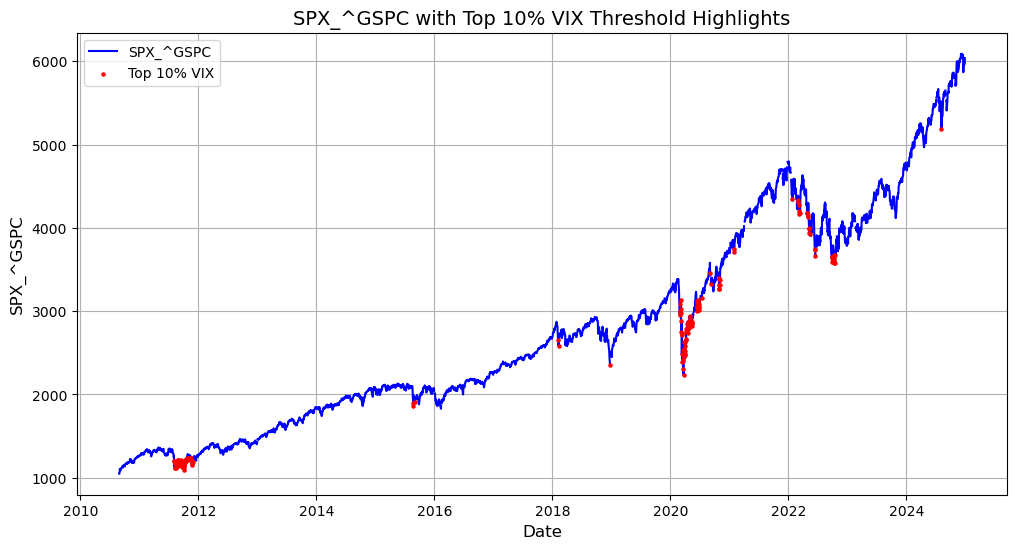

In [5]:
# Plot the entire 'SPX_^GSPC' data
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')

# Highlight the points where 'VIX_yfinance_^VIX' is in the top 10%
plt.scatter(merged_df.loc[highlight_indices_VIX, 'Date'], merged_df.loc[highlight_indices_VIX, 'SPX_^GSPC'], 
            color='red', label='Top 10% VIX', zorder=5, s=5)

# Add labels, title, and legend
plt.title('SPX_^GSPC with Top 10% VIX Threshold Highlights', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [6]:
# Calculate the 90th percentile threshold for 'VIX_yfinance_^VIX'
vix_calc_threshold = merged_df['VIX'].quantile(0.95)

# Identify dates where 'VIX_yfinance_^VIX' exceeds the threshold
highlight_dates_VIX_calc = merged_df[merged_df['VIX'] > vix_calc_threshold]['Date']
highlight_indices_VIX_calc = merged_df['Date'].isin(highlight_dates_VIX_calc)

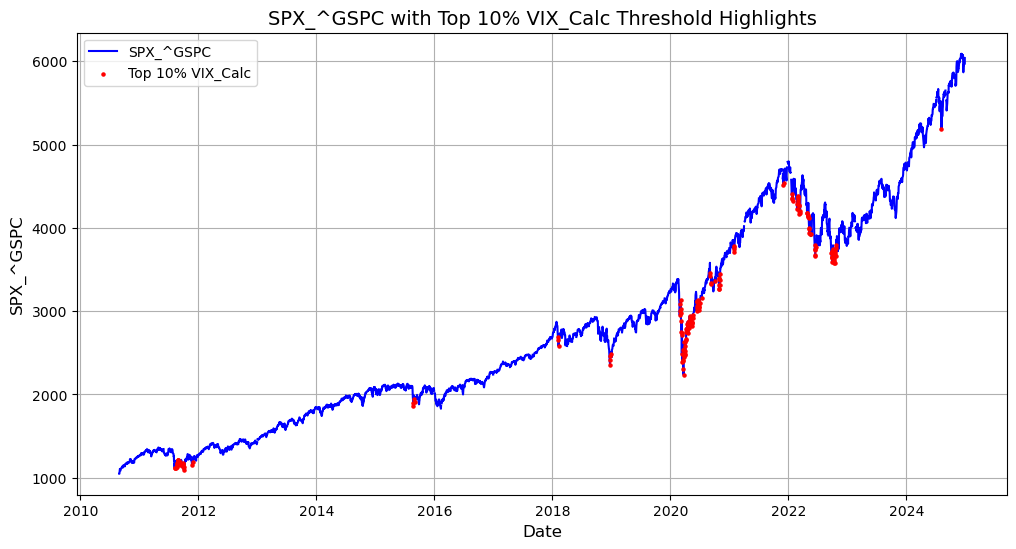

In [7]:
# Plot the entire 'SPX_^GSPC' data
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')

# Highlight the points where 'VIX_yfinance_^VIX' is in the top 10%
plt.scatter(merged_df.loc[highlight_indices_VIX_calc, 'Date'], merged_df.loc[highlight_indices_VIX_calc, 'SPX_^GSPC'], 
            color='red', label='Top 10% VIX_Calc', zorder=5, s=5)

# Add labels, title, and legend
plt.title('SPX_^GSPC with Top 10% VIX_Calc Threshold Highlights', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [8]:
# Calculate the 90th percentile threshold for 'VIX_yfinance_^VIX'
call_contribution_threshold = merged_df['Call_contribution'].quantile(0.95)

# Identify dates where 'VIX_yfinance_^VIX' exceeds the threshold
highlight_dates_call = merged_df[merged_df['Call_contribution'] > call_contribution_threshold]['Date']
highlight_indices_call = merged_df['Date'].isin(highlight_dates_call)

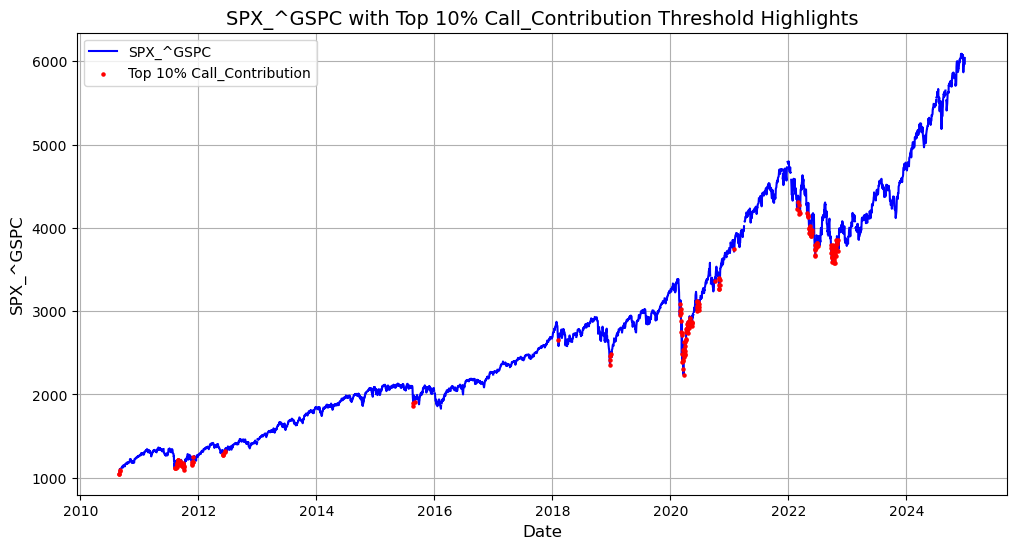

In [9]:
# Plot the entire 'SPX_^GSPC' data
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')

# Highlight the points where 'VIX_yfinance_^VIX' is in the top 10%
plt.scatter(merged_df.loc[highlight_indices_call, 'Date'], merged_df.loc[highlight_indices_call, 'SPX_^GSPC'], 
            color='red', label='Top 10% Call_Contribution', zorder=5, s=5)

# Add labels, title, and legend
plt.title('SPX_^GSPC with Top 10% Call_Contribution Threshold Highlights', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [10]:
# Calculate the 90th percentile threshold for 'VIX_yfinance_^VIX'
put_contribution_threshold = merged_df['Put_contribution'].quantile(0.95)

# Identify dates where 'VIX_yfinance_^VIX' exceeds the threshold
highlight_dates_put = merged_df[merged_df['Call_contribution'] > put_contribution_threshold]['Date']
highlight_indices_put = merged_df['Date'].isin(highlight_dates_put)

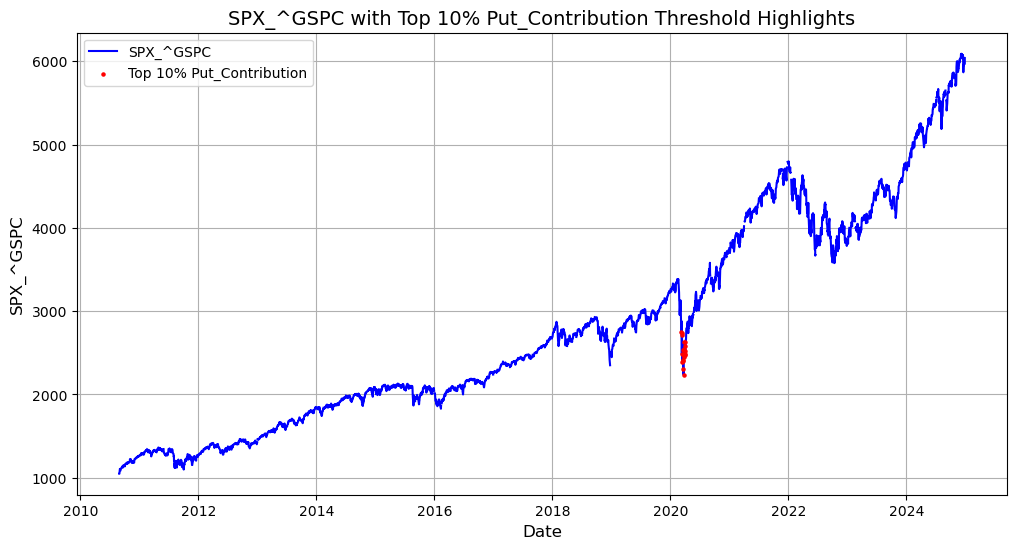

In [11]:
# Plot the entire 'SPX_^GSPC' data
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')

# Highlight the points where 'VIX_yfinance_^VIX' is in the top 10%
plt.scatter(merged_df.loc[highlight_indices_put, 'Date'], merged_df.loc[highlight_indices_put, 'SPX_^GSPC'], 
            color='red', label='Top 10% Put_Contribution', zorder=5, s=5)

# Add labels, title, and legend
plt.title('SPX_^GSPC with Top 10% Put_Contribution Threshold Highlights', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [12]:
# Calculate the 90th percentile threshold for 'VIX_yfinance_^VIX'
ratio_contribution_threshold = merged_df['Put_Call_Ratio'].quantile(0.95)

# Identify dates where 'VIX_yfinance_^VIX' exceeds the threshold
highlight_dates_ratio = merged_df[merged_df['Put_Call_Ratio'] > ratio_contribution_threshold]['Date']
highlight_indices_ratio = merged_df['Date'].isin(highlight_dates_ratio)

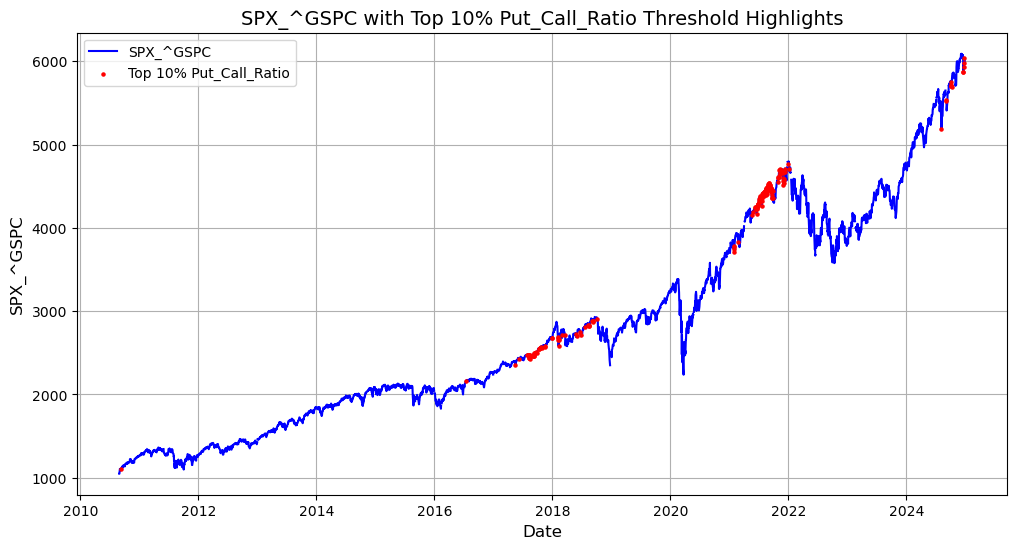

In [13]:
# Plot the entire 'SPX_^GSPC' data
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')

# Highlight the points where 'VIX_yfinance_^VIX' is in the top 10%
plt.scatter(merged_df.loc[highlight_indices_ratio, 'Date'], merged_df.loc[highlight_indices_ratio, 'SPX_^GSPC'], 
            color='red', label='Top 10% Put_Call_Ratio', zorder=5, s=5)

# Add labels, title, and legend
plt.title('SPX_^GSPC with Top 10% Put_Call_Ratio Threshold Highlights', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

In [14]:
# Calculate the 90th percentile threshold for 'VIX_yfinance_^VIX'
diff_contribution_threshold = merged_df['Put_Call_Diff'].quantile(0.95)

# Identify dates where 'VIX_yfinance_^VIX' exceeds the threshold
highlight_dates_diff = merged_df[merged_df['Put_Call_Diff'] > diff_contribution_threshold]['Date']
highlight_indices_diff = merged_df['Date'].isin(highlight_dates_diff)

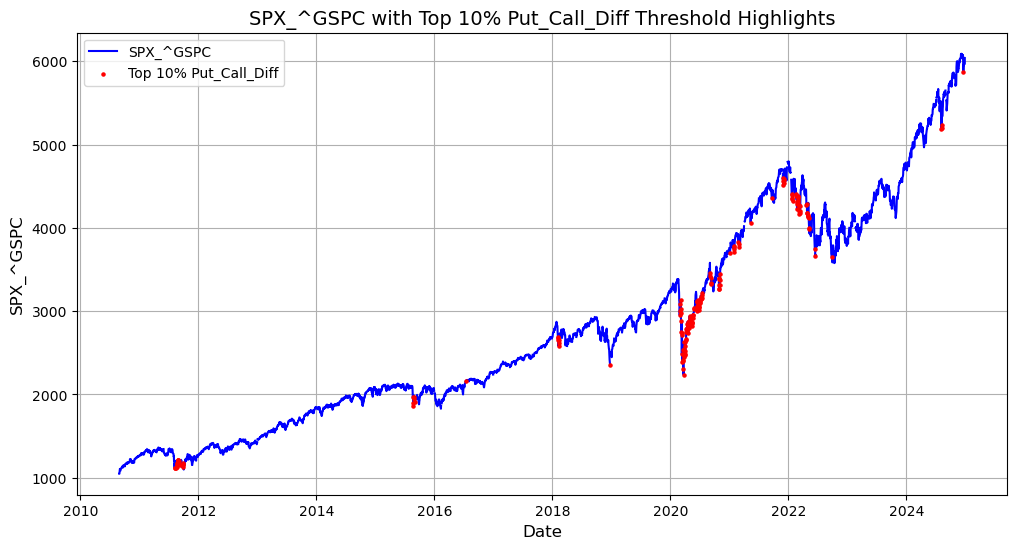

In [15]:
# Plot the entire 'SPX_^GSPC' data
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')

# Highlight the points where 'VIX_yfinance_^VIX' is in the top 10%
plt.scatter(merged_df.loc[highlight_indices_diff, 'Date'], merged_df.loc[highlight_indices_diff, 'SPX_^GSPC'], 
            color='red', label='Top 10% Put_Call_Diff', zorder=5, s=5)

# Add labels, title, and legend
plt.title('SPX_^GSPC with Top 10% Put_Call_Diff Threshold Highlights', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

## Dynamic Threshold with Cap

### Data

In [47]:
df = merged_df.copy()

In [48]:
# Initialize an empty column to store the dynamic 90th percentile
df['Dynamic90Percentile_VIX'] = None
df['Dynamic95Percentile_VIX'] = None
df['Dynamic98Percentile_VIX'] = None

df['Dynamic90Percentile_VIX_Calc'] = None
df['Dynamic95Percentile_VIX_Calc'] = None
df['Dynamic98Percentile_VIX_Calc'] = None

df['Dynamic90Percentile_Call'] = None
df['Dynamic95Percentile_Call'] = None
df['Dynamic98Percentile_Call'] = None

df['Dynamic90Percentile_Put'] = None
df['Dynamic95Percentile_Put'] = None
df['Dynamic98Percentile_Put'] = None

df['Dynamic90Percentile_Ratio'] = None
df['Dynamic95Percentile_Ratio'] = None
df['Dynamic98Percentile_Ratio'] = None

df['Dynamic90Percentile_Diff'] = None
df['Dynamic95Percentile_Diff'] = None
df['Dynamic98Percentile_Diff'] = None

# Calculate the cumulative 90th percentile for each row
for i in range(100, len(df)):  # Start from the 500th row as base data
    df.loc[i, 'Dynamic90Percentile_VIX'] = df.loc[:i, 'VIX_yfinance_^VIX'].quantile(0.90)
    df.loc[i, 'Dynamic95Percentile_VIX'] = df.loc[:i, 'VIX_yfinance_^VIX'].quantile(0.95)
    df.loc[i, 'Dynamic98Percentile_VIX'] = df.loc[:i, 'VIX_yfinance_^VIX'].quantile(0.98)
    
    df.loc[i, 'Dynamic90Percentile_VIX_Calc'] = df.loc[:i, 'VIX'].quantile(0.90)
    df.loc[i, 'Dynamic95Percentile_VIX_Calc'] = df.loc[:i, 'VIX'].quantile(0.95)
    df.loc[i, 'Dynamic98Percentile_VIX_Calc'] = df.loc[:i, 'VIX'].quantile(0.98)

    df.loc[i, 'Dynamic90Percentile_Call'] = df.loc[:i, 'Call_contribution'].quantile(0.90)
    df.loc[i, 'Dynamic95Percentile_Call'] = df.loc[:i, 'Call_contribution'].quantile(0.95)
    df.loc[i, 'Dynamic98Percentile_Call'] = df.loc[:i, 'Call_contribution'].quantile(0.98)

    df.loc[i, 'Dynamic90Percentile_Put'] = df.loc[:i, 'Put_contribution'].quantile(0.90)
    df.loc[i, 'Dynamic95Percentile_Put'] = df.loc[:i, 'Put_contribution'].quantile(0.95)
    df.loc[i, 'Dynamic98Percentile_Put'] = df.loc[:i, 'Put_contribution'].quantile(0.98)

    df.loc[i, 'Dynamic90Percentile_Ratio'] = df.loc[:i, 'Put_Call_Ratio'].quantile(0.90)
    df.loc[i, 'Dynamic95Percentile_Ratio'] = df.loc[:i, 'Put_Call_Ratio'].quantile(0.95)
    df.loc[i, 'Dynamic98Percentile_Ratio'] = df.loc[:i, 'Put_Call_Ratio'].quantile(0.98)

    df.loc[i, 'Dynamic90Percentile_Diff'] = df.loc[:i, 'Put_Call_Diff'].quantile(0.90)
    df.loc[i, 'Dynamic95Percentile_Diff'] = df.loc[:i, 'Put_Call_Diff'].quantile(0.95)
    df.loc[i, 'Dynamic98Percentile_Diff'] = df.loc[:i, 'Put_Call_Diff'].quantile(0.98)


# Forward fill missing values in 'Dynamic90Percentile'
df['Dynamic90Percentile_VIX'] = df['Dynamic90Percentile_VIX'].ffill()
df['Dynamic95Percentile_VIX'] = df['Dynamic95Percentile_VIX'].ffill()
df['Dynamic98Percentile_VIX'] = df['Dynamic98Percentile_VIX'].ffill()

df['Dynamic90Percentile_VIX_Calc'] = df['Dynamic90Percentile_VIX_Calc'].ffill()
df['Dynamic95Percentile_VIX_Calc'] = df['Dynamic95Percentile_VIX_Calc'].ffill()
df['Dynamic98Percentile_VIX_Calc'] = df['Dynamic98Percentile_VIX_Calc'].ffill()

df['Dynamic90Percentile_Call'] = df['Dynamic90Percentile_Call'].ffill()
df['Dynamic95Percentile_Call'] = df['Dynamic95Percentile_Call'].ffill()
df['Dynamic98Percentile_Call'] = df['Dynamic98Percentile_Call'].ffill()

df['Dynamic90Percentile_Put'] = df['Dynamic90Percentile_Put'].ffill()
df['Dynamic95Percentile_Put'] = df['Dynamic95Percentile_Put'].ffill()
df['Dynamic98Percentile_Put'] = df['Dynamic98Percentile_Put'].ffill()

df['Dynamic90Percentile_Ratio'] = df['Dynamic90Percentile_Ratio'].ffill()
df['Dynamic95Percentile_Ratio'] = df['Dynamic95Percentile_Ratio'].ffill()
df['Dynamic98Percentile_Ratio'] = df['Dynamic98Percentile_Ratio'].ffill()

df['Dynamic90Percentile_Diff'] = df['Dynamic90Percentile_Diff'].ffill()
df['Dynamic95Percentile_Diff'] = df['Dynamic95Percentile_Diff'].ffill()
df['Dynamic98Percentile_Diff'] = df['Dynamic98Percentile_Diff'].ffill()

# Identify rows where 'VIX_yfinance_^VIX' exceeds the dynamic 95th percentile
df['Highlight_VIX'] = df['VIX_yfinance_^VIX'] > df['Dynamic95Percentile_VIX']
df['Highlight_VIX_Calc'] = df['VIX'] > df['Dynamic95Percentile_VIX_Calc']
df['Highlight_Call'] = df['Call_contribution'] > df['Dynamic95Percentile_Call']
df['Highlight_Put'] = df['Put_contribution'] > df['Dynamic95Percentile_Put']
df['Highlight_Ratio'] = df['Put_Call_Ratio'] > df['Dynamic95Percentile_Ratio']
df['Highlight_Diff'] = df['Put_Call_Diff'] > df['Dynamic95Percentile_Diff']

# Identify rows where the value is above the 90th percentile and below the 95th percentile
df['Highlight_90_98_VIX'] = (
    (df['VIX_yfinance_^VIX'] > df['Dynamic90Percentile_VIX']) & 
    (df['VIX_yfinance_^VIX'] <= df['Dynamic98Percentile_VIX'])
)
df['Highlight_90_98_VIX_Calc'] = (
    (df['VIX'] > df['Dynamic90Percentile_VIX_Calc']) & 
    (df['VIX'] <= df['Dynamic98Percentile_VIX_Calc'])
)
df['Highlight_90_98_Call'] = (
    (df['Call_contribution'] > df['Dynamic90Percentile_Call']) & 
    (df['Call_contribution'] <= df['Dynamic98Percentile_Call'])
)
df['Highlight_90_98_Put'] = (
    (df['Put_contribution'] > df['Dynamic90Percentile_Put']) & 
    (df['Put_contribution'] <= df['Dynamic98Percentile_Put'])
)
df['Highlight_90_98_Ratio'] = (
    (df['Put_Call_Ratio'] > df['Dynamic90Percentile_Ratio']) & 
    (df['Put_Call_Ratio'] <= df['Dynamic98Percentile_Ratio'])
)
df['Highlight_90_98_Diff'] = (
    (df['Put_Call_Diff'] > df['Dynamic90Percentile_Diff']) & 
    (df['Put_Call_Diff'] <= df['Dynamic98Percentile_Diff'])
)

/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/3262138510.py:54: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dynamic90Percentile_VIX'] = df['Dynamic90Percentile_VIX'].ffill()
/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/3262138510.py:55: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dynamic95Percentile_VIX'] = df['Dynamic95Percentile_VIX'].ffill()
/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/3262138510.py:56: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is depre

### VIX

In [64]:
df = merged_df.copy()

# Initialize an empty column to store the dynamic 90th percentile
df['Dynamic90Percentile_VIX'] = None
df['Dynamic95Percentile_VIX'] = None
df['Dynamic98Percentile_VIX'] = None

# Calculate the cumulative 90th percentile for each row
for i in range(100, len(df)):  # Start from the 500th row as base data
    df.loc[i, 'Dynamic90Percentile_VIX'] = df.loc[:i, 'VIX_yfinance_^VIX'].quantile(0.90)
    df.loc[i, 'Dynamic95Percentile_VIX'] = df.loc[:i, 'VIX_yfinance_^VIX'].quantile(0.95)
    df.loc[i, 'Dynamic98Percentile_VIX'] = df.loc[:i, 'VIX_yfinance_^VIX'].quantile(0.98)

# Forward fill missing values in 'Dynamic90Percentile'
df['Dynamic90Percentile_VIX'] = df['Dynamic90Percentile_VIX'].ffill()
df['Dynamic95Percentile_VIX'] = df['Dynamic95Percentile_VIX'].ffill()
df['Dynamic98Percentile_VIX'] = df['Dynamic98Percentile_VIX'].ffill()

# Identify rows where 'VIX_yfinance_^VIX' exceeds the dynamic 95th percentile
df['Highlight_VIX'] = df['VIX_yfinance_^VIX'] > df['Dynamic95Percentile_VIX']

# Identify rows where the value is above the 90th percentile and below the 95th percentile
df['Highlight_90_98_VIX'] = (
    (df['VIX_yfinance_^VIX'] > df['Dynamic90Percentile_VIX']) & 
    (df['VIX_yfinance_^VIX'] <= df['Dynamic98Percentile_VIX'])
)

/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/2083706212.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dynamic90Percentile_VIX'] = df['Dynamic90Percentile_VIX'].ffill()
/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/2083706212.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dynamic95Percentile_VIX'] = df['Dynamic95Percentile_VIX'].ffill()
/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/2083706212.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is depre

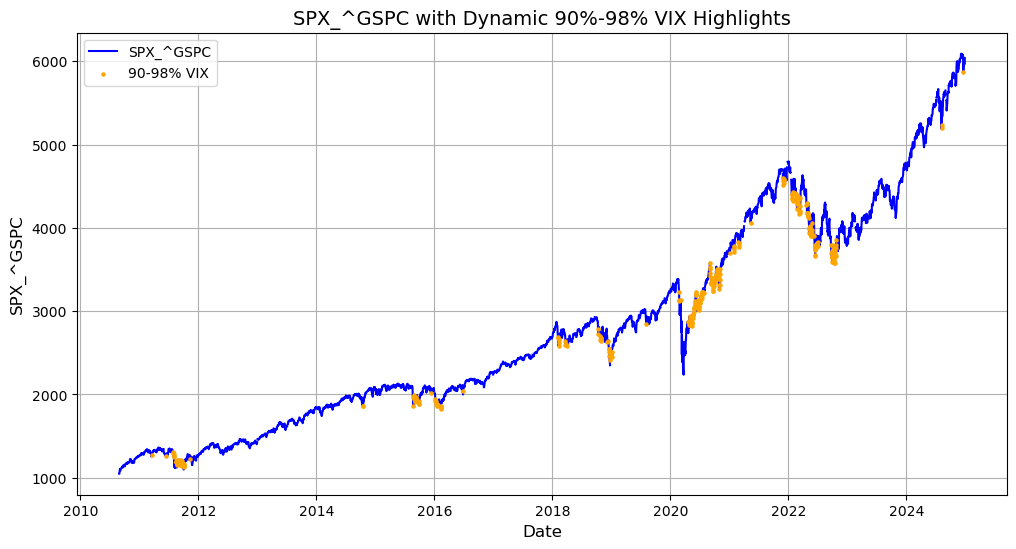

In [65]:
# Plot the entire 'SPX_^GSPC' data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')

# Highlight points between the 90th and 95th percentiles
highlight_90_95 = df[df['Highlight_90_98_VIX']]
plt.scatter(
    highlight_90_95['Date'], 
    highlight_90_95['SPX_^GSPC'], 
    color='orange', 
    label='90-98% VIX', 
    zorder=5, 
    s=5
)

# Add labels, title, and legend
plt.title('SPX_^GSPC with Dynamic 90%-98% VIX Highlights', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

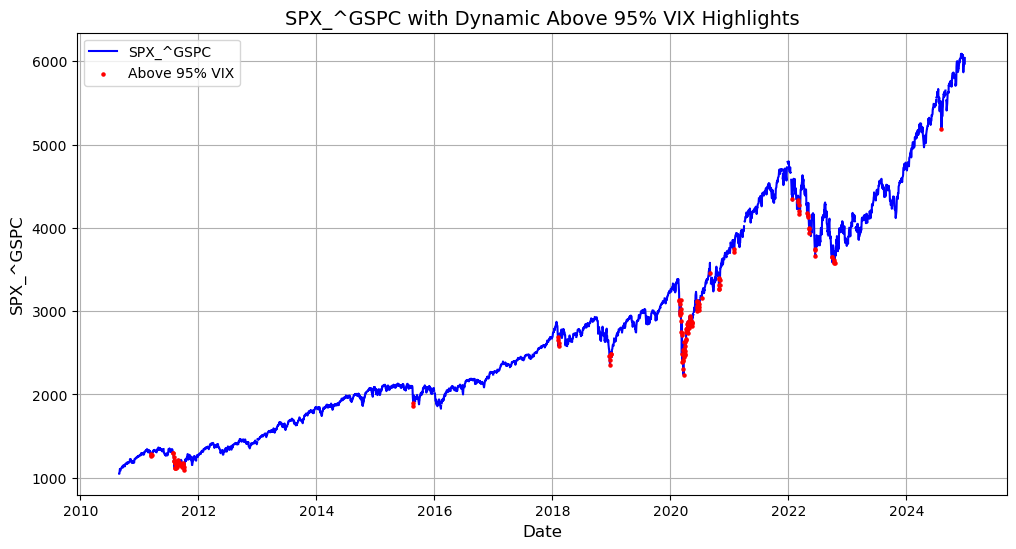

In [66]:
# Plot 2: Highlight points above the 95th percentile
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')
highlight_above95 = df[df['Highlight_VIX']]
plt.scatter(
    highlight_above95['Date'], 
    highlight_above95['SPX_^GSPC'], 
    color='red', 
    label='Above 95% VIX', 
    zorder=5, 
    s=5
)
plt.title('SPX_^GSPC with Dynamic Above 95% VIX Highlights', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### Calculated VIX

In [67]:
df = merged_df.copy()

# Initialize an empty column to store the dynamic 90th percentile
df['Dynamic90Percentile_VIX_Calc'] = None
df['Dynamic95Percentile_VIX_Calc'] = None
df['Dynamic98Percentile_VIX_Calc'] = None

# Calculate the cumulative 90th percentile for each row
for i in range(100, len(df)):  # Start from the 500th row as base data
    df.loc[i, 'Dynamic90Percentile_VIX_Calc'] = df.loc[:i, 'VIX'].quantile(0.90)
    df.loc[i, 'Dynamic95Percentile_VIX_Calc'] = df.loc[:i, 'VIX'].quantile(0.95)
    df.loc[i, 'Dynamic98Percentile_VIX_Calc'] = df.loc[:i, 'VIX'].quantile(0.98)

# Forward fill missing values in 'Dynamic90Percentile'
df['Dynamic90Percentile_VIX_Calc'] = df['Dynamic90Percentile_VIX_Calc'].ffill()
df['Dynamic95Percentile_VIX_Calc'] = df['Dynamic95Percentile_VIX_Calc'].ffill()
df['Dynamic98Percentile_VIX_Calc'] = df['Dynamic98Percentile_VIX_Calc'].ffill()

# Identify rows where 'VIX_yfinance_^VIX' exceeds the dynamic 95th percentile
df['Highlight_VIX_Calc'] = df['VIX'] > df['Dynamic95Percentile_VIX_Calc']

# Identify rows where the value is above the 90th percentile and below the 95th percentile
df['Highlight_90_98_VIX_Calc'] = (
    (df['VIX'] > df['Dynamic90Percentile_VIX_Calc']) & 
    (df['VIX'] <= df['Dynamic98Percentile_VIX_Calc'])
)

/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/671313550.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dynamic90Percentile_VIX_Calc'] = df['Dynamic90Percentile_VIX_Calc'].ffill()
/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/671313550.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dynamic95Percentile_VIX_Calc'] = df['Dynamic95Percentile_VIX_Calc'].ffill()
/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/671313550.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill

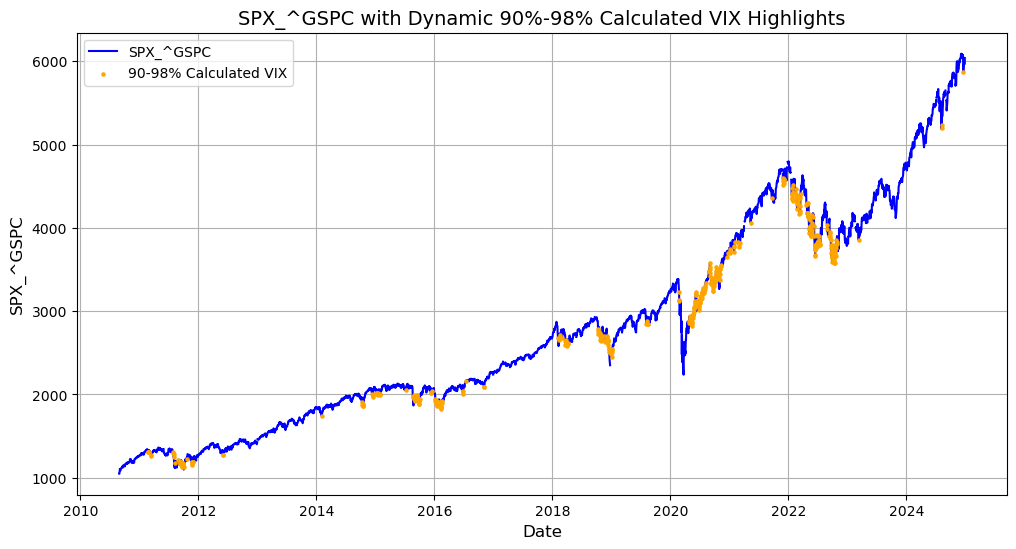

In [68]:
# Plot the entire 'SPX_^GSPC' data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')

# Highlight points between the 90th and 95th percentiles
highlight_90_95 = df[df['Highlight_90_98_VIX_Calc']]
plt.scatter(
    highlight_90_95['Date'], 
    highlight_90_95['SPX_^GSPC'], 
    color='orange', 
    label='90-98% Calculated VIX', 
    zorder=5, 
    s=5
)

# Add labels, title, and legend
plt.title('SPX_^GSPC with Dynamic 90%-98% Calculated VIX Highlights', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

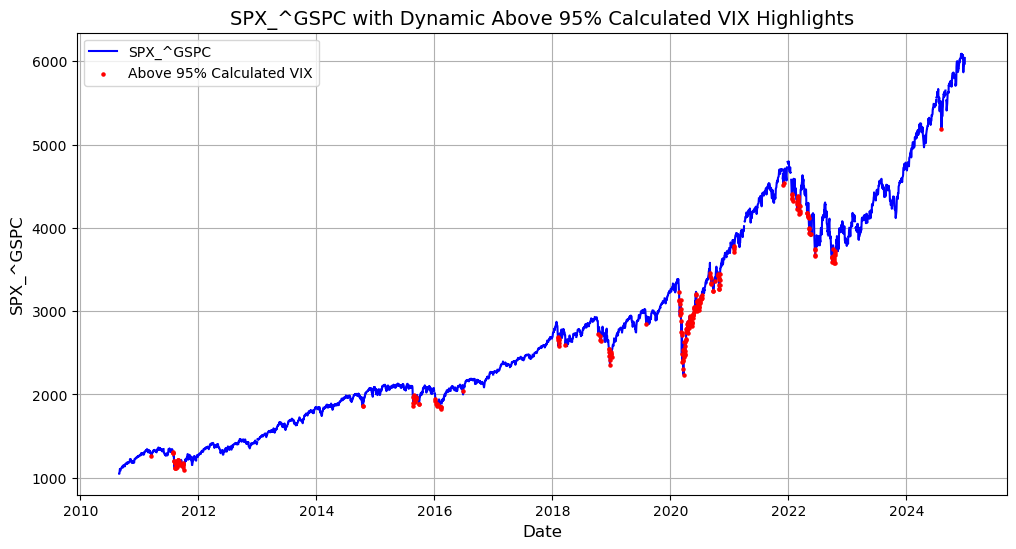

In [69]:
# Plot 2: Highlight points above the 95th percentile
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')
highlight_above95 = df[df['Highlight_VIX_Calc']]
plt.scatter(
    highlight_above95['Date'], 
    highlight_above95['SPX_^GSPC'], 
    color='red', 
    label='Above 95% Calculated VIX', 
    zorder=5, 
    s=5
)
plt.title('SPX_^GSPC with Dynamic Above 95% Calculated VIX Highlights', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### Call Contribution

In [70]:
df = merged_df.copy()

# Initialize an empty column to store the dynamic 90th percentile
df['Dynamic90Percentile_Call'] = None
df['Dynamic95Percentile_Call'] = None
df['Dynamic98Percentile_Call'] = None

# Calculate the cumulative 90th percentile for each row
for i in range(100, len(df)):  # Start from the 500th row as base data
    df.loc[i, 'Dynamic90Percentile_Call'] = df.loc[:i, 'Call_contribution'].quantile(0.90)
    df.loc[i, 'Dynamic95Percentile_Call'] = df.loc[:i, 'Call_contribution'].quantile(0.95)
    df.loc[i, 'Dynamic98Percentile_Call'] = df.loc[:i, 'Call_contribution'].quantile(0.98)

# Forward fill missing values in 'Dynamic90Percentile'
df['Dynamic90Percentile_Call'] = df['Dynamic90Percentile_Call'].ffill()
df['Dynamic95Percentile_Call'] = df['Dynamic95Percentile_Call'].ffill()
df['Dynamic98Percentile_Call'] = df['Dynamic98Percentile_Call'].ffill()

# Identify rows where 'VIX_yfinance_^VIX' exceeds the dynamic 95th percentile
df['Highlight_Call'] = df['Call_contribution'] > df['Dynamic95Percentile_Call']

# Identify rows where the value is above the 90th percentile and below the 95th percentile
df['Highlight_90_98_Call'] = (
    (df['Call_contribution'] > df['Dynamic90Percentile_Call']) & 
    (df['Call_contribution'] <= df['Dynamic98Percentile_Call'])
)

/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/1376554766.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dynamic90Percentile_Call'] = df['Dynamic90Percentile_Call'].ffill()
/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/1376554766.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dynamic95Percentile_Call'] = df['Dynamic95Percentile_Call'].ffill()
/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/1376554766.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is d

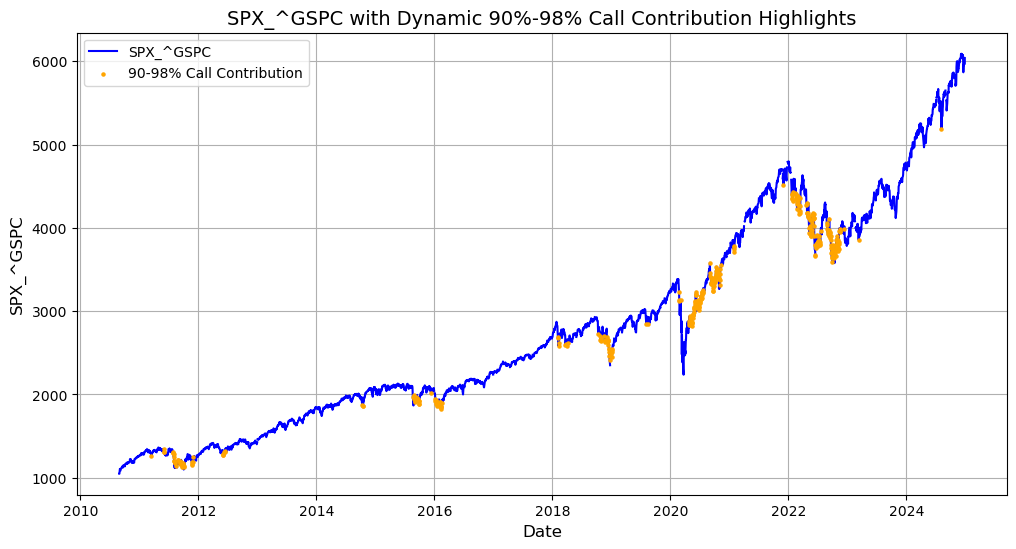

In [71]:
# Plot the entire 'SPX_^GSPC' data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')

# Highlight points between the 90th and 95th percentiles
highlight_90_95 = df[df['Highlight_90_98_Call']]
plt.scatter(
    highlight_90_95['Date'], 
    highlight_90_95['SPX_^GSPC'], 
    color='orange', 
    label='90-98% Call Contribution', 
    zorder=5, 
    s=5
)

# Add labels, title, and legend
plt.title('SPX_^GSPC with Dynamic 90%-98% Call Contribution Highlights', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

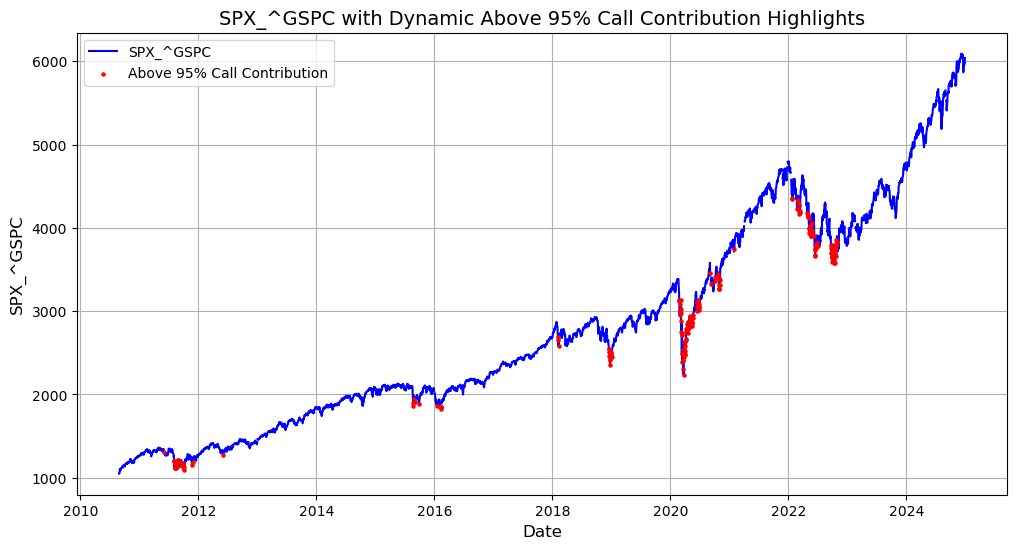

In [72]:
# Plot 2: Highlight points above the 95th percentile
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')
highlight_above95 = df[df['Highlight_Call']]
plt.scatter(
    highlight_above95['Date'], 
    highlight_above95['SPX_^GSPC'], 
    color='red', 
    label='Above 95% Call Contribution', 
    zorder=5, 
    s=5
)
plt.title('SPX_^GSPC with Dynamic Above 95% Call Contribution Highlights', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### Put Contribution

In [73]:
df = merged_df.copy()

# Initialize an empty column to store the dynamic 90th percentile
df['Dynamic90Percentile_Put'] = None
df['Dynamic95Percentile_Put'] = None
df['Dynamic98Percentile_Put'] = None

# Calculate the cumulative 90th percentile for each row
for i in range(100, len(df)):  # Start from the 500th row as base data
    df.loc[i, 'Dynamic90Percentile_Put'] = df.loc[:i, 'Put_contribution'].quantile(0.90)
    df.loc[i, 'Dynamic95Percentile_Put'] = df.loc[:i, 'Put_contribution'].quantile(0.95)
    df.loc[i, 'Dynamic98Percentile_Put'] = df.loc[:i, 'Put_contribution'].quantile(0.98)

# Forward fill missing values in 'Dynamic90Percentile'
df['Dynamic90Percentile_Put'] = df['Dynamic90Percentile_Put'].ffill()
df['Dynamic95Percentile_Put'] = df['Dynamic95Percentile_Put'].ffill()
df['Dynamic98Percentile_Put'] = df['Dynamic98Percentile_Put'].ffill()

# Identify rows where 'VIX_yfinance_^VIX' exceeds the dynamic 95th percentile
df['Highlight_Put'] = df['Put_contribution'] > df['Dynamic95Percentile_Put']

# Identify rows where the value is above the 90th percentile and below the 95th percentile
df['Highlight_90_98_Put'] = (
    (df['Put_contribution'] > df['Dynamic90Percentile_Put']) & 
    (df['Put_contribution'] <= df['Dynamic98Percentile_Put'])
)

/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/1669772760.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dynamic90Percentile_Put'] = df['Dynamic90Percentile_Put'].ffill()
/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/1669772760.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dynamic95Percentile_Put'] = df['Dynamic95Percentile_Put'].ffill()
/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/1669772760.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is depre

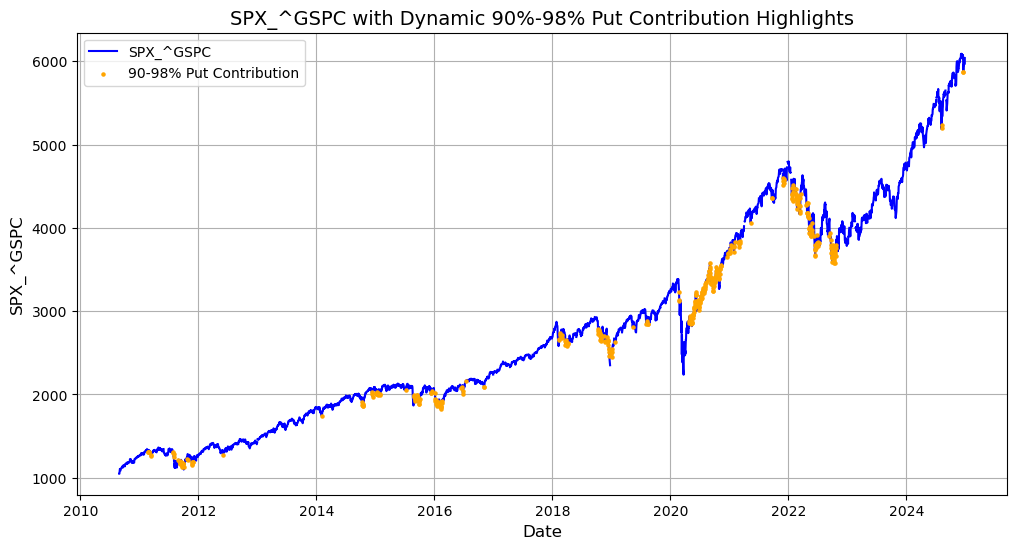

In [74]:
# Plot the entire 'SPX_^GSPC' data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')

# Highlight points between the 90th and 95th percentiles
highlight_90_95 = df[df['Highlight_90_98_Put']]
plt.scatter(
    highlight_90_95['Date'], 
    highlight_90_95['SPX_^GSPC'], 
    color='orange', 
    label='90-98% Put Contribution', 
    zorder=5, 
    s=5
)

# Add labels, title, and legend
plt.title('SPX_^GSPC with Dynamic 90%-98% Put Contribution Highlights', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

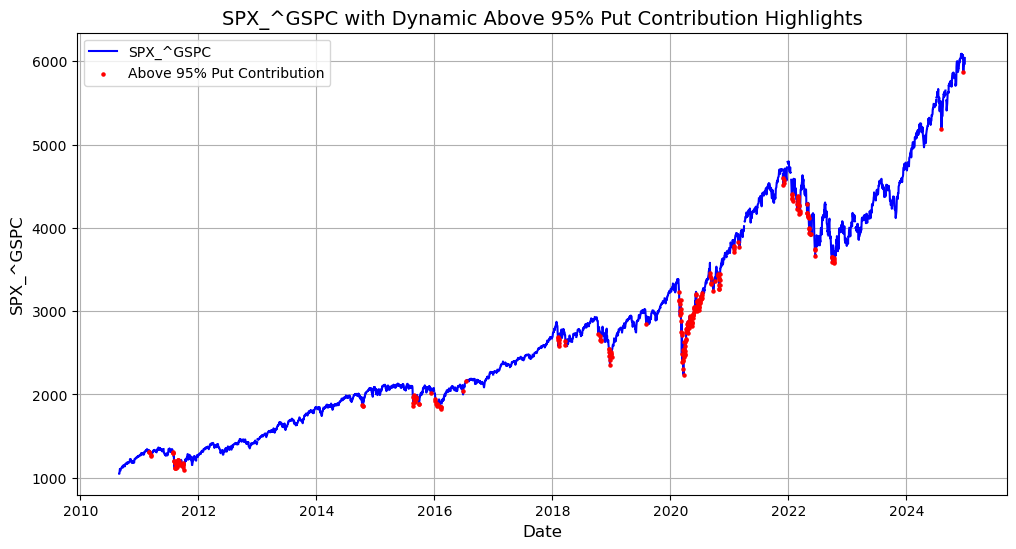

In [75]:
# Plot 2: Highlight points above the 95th percentile
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')
highlight_above95 = df[df['Highlight_Put']]
plt.scatter(
    highlight_above95['Date'], 
    highlight_above95['SPX_^GSPC'], 
    color='red', 
    label='Above 95% Put Contribution', 
    zorder=5, 
    s=5
)
plt.title('SPX_^GSPC with Dynamic Above 95% Put Contribution Highlights', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### Put/Call Ratio

In [235]:
df = merged_df.copy()

# Initialize an empty column to store the dynamic 90th percentile
df['Dynamic5Percentile_Ratio'] = None
df['Dynamic90Percentile_Ratio'] = None
df['Dynamic95Percentile_Ratio'] = None
df['Dynamic98Percentile_Ratio'] = None

# Calculate the cumulative 90th percentile for each row
for i in range(100, len(df)):  # Start from the 500th row as base data
    df.loc[i, 'Dynamic5Percentile_Ratio'] = df.loc[:i, 'Put_Call_Ratio'].quantile(0.05)
    df.loc[i, 'Dynamic90Percentile_Ratio'] = df.loc[:i, 'Put_Call_Ratio'].quantile(0.90)
    df.loc[i, 'Dynamic95Percentile_Ratio'] = df.loc[:i, 'Put_Call_Ratio'].quantile(0.95)
    df.loc[i, 'Dynamic98Percentile_Ratio'] = df.loc[:i, 'Put_Call_Ratio'].quantile(0.98)

# Forward fill missing values in 'Dynamic90Percentile'
df['Dynamic5Percentile_Ratio'] = df['Dynamic5Percentile_Ratio'].ffill()
df['Dynamic90Percentile_Ratio'] = df['Dynamic90Percentile_Ratio'].ffill()
df['Dynamic95Percentile_Ratio'] = df['Dynamic95Percentile_Ratio'].ffill()
df['Dynamic98Percentile_Ratio'] = df['Dynamic98Percentile_Ratio'].ffill()

# Identify rows where 'VIX_yfinance_^VIX' exceeds the dynamic 95th percentile
df['Highlight_Ratio'] = df['Put_Call_Ratio'] > df['Dynamic95Percentile_Ratio']

# Identify rows where 'VIX_yfinance_^VIX' drops below the dynamic 5th percentile
df['Highlight_Ratio_L'] = df['Put_Call_Ratio'] < df['Dynamic5Percentile_Ratio']

# Identify rows where the value is above the 90th percentile and below the 95th percentile
df['Highlight_90_98_Ratio'] = (
    (df['Put_Call_Ratio'] > df['Dynamic90Percentile_Ratio']) & 
    (df['Put_Call_Ratio'] <= df['Dynamic98Percentile_Ratio'])
)

/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/810386984.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dynamic5Percentile_Ratio'] = df['Dynamic5Percentile_Ratio'].ffill()
/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/810386984.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dynamic90Percentile_Ratio'] = df['Dynamic90Percentile_Ratio'].ffill()
/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/810386984.py:19: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is de

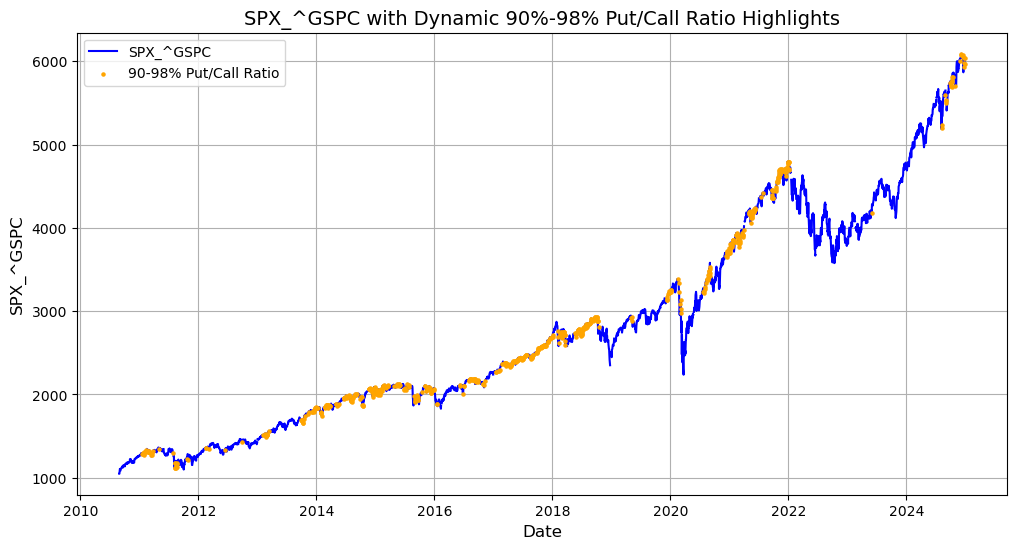

In [236]:
# Plot the entire 'SPX_^GSPC' data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')

# Highlight points between the 90th and 95th percentiles
highlight_90_95 = df[df['Highlight_90_98_Ratio']]
plt.scatter(
    highlight_90_95['Date'], 
    highlight_90_95['SPX_^GSPC'], 
    color='orange', 
    label='90-98% Put/Call Ratio', 
    zorder=5, 
    s=5
)

# Add labels, title, and legend
plt.title('SPX_^GSPC with Dynamic 90%-98% Put/Call Ratio Highlights', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

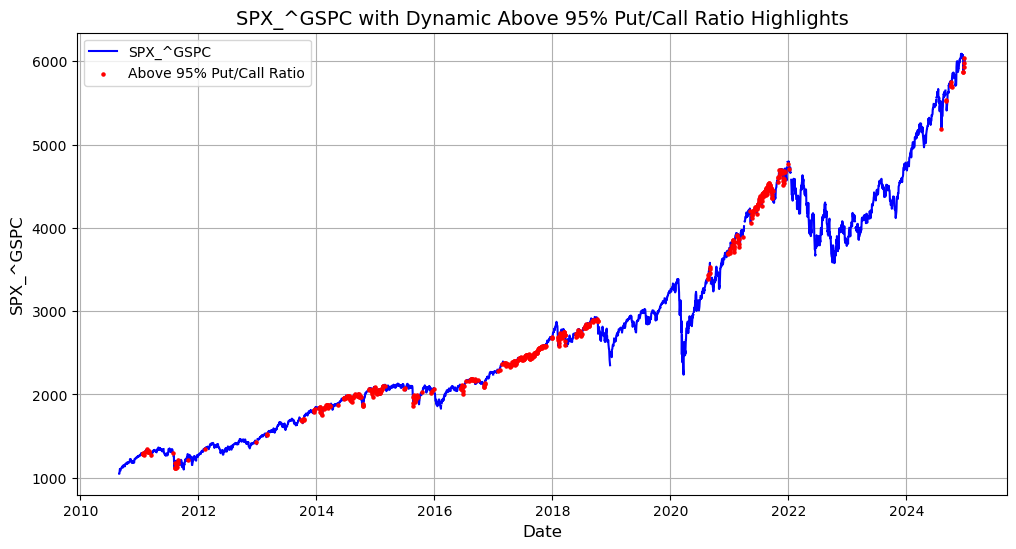

In [237]:
# Plot 2: Highlight points above the 95th percentile
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')
highlight_above95 = df[df['Highlight_Ratio']]
plt.scatter(
    highlight_above95['Date'], 
    highlight_above95['SPX_^GSPC'], 
    color='red', 
    label='Above 95% Put/Call Ratio', 
    zorder=5, 
    s=5
)
plt.title('SPX_^GSPC with Dynamic Above 95% Put/Call Ratio Highlights', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

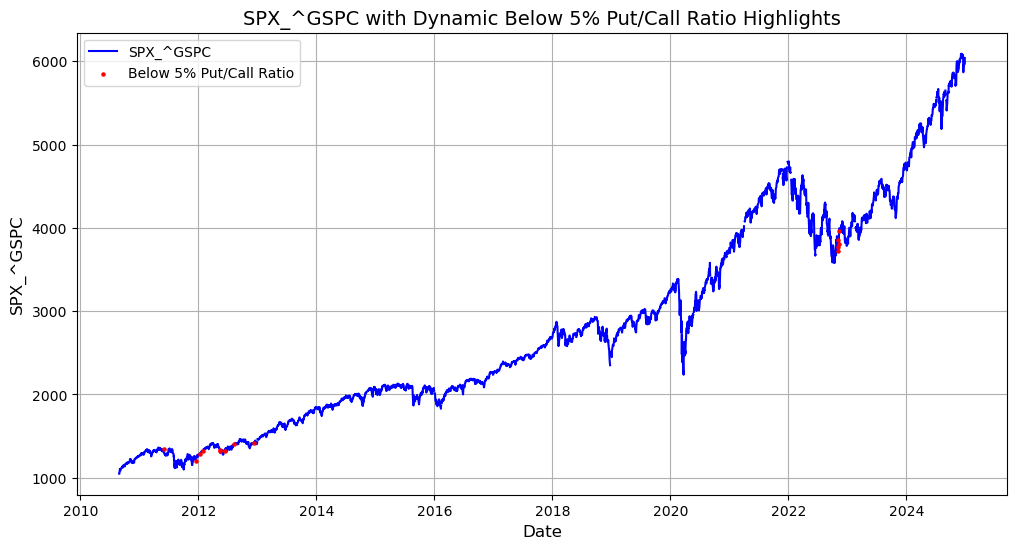

In [101]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')
highlight_above95 = df[df['Highlight_Ratio_L']]
plt.scatter(
    highlight_above95['Date'], 
    highlight_above95['SPX_^GSPC'], 
    color='red', 
    label='Below 5% Put/Call Ratio', 
    zorder=5, 
    s=5
)
plt.title('SPX_^GSPC with Dynamic Below 5% Put/Call Ratio Highlights', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### Put/Call Difference

In [79]:
df = merged_df.copy()

# Initialize an empty column to store the dynamic 90th percentile
df['Dynamic90Percentile_Diff'] = None
df['Dynamic95Percentile_Diff'] = None
df['Dynamic98Percentile_Diff'] = None

# Calculate the cumulative 90th percentile for each row
for i in range(100, len(df)):  # Start from the 500th row as base data
    df.loc[i, 'Dynamic90Percentile_Diff'] = df.loc[:i, 'Put_Call_Diff'].quantile(0.90)
    df.loc[i, 'Dynamic95Percentile_Diff'] = df.loc[:i, 'Put_Call_Diff'].quantile(0.95)
    df.loc[i, 'Dynamic98Percentile_Diff'] = df.loc[:i, 'Put_Call_Diff'].quantile(0.98)

# Forward fill missing values in 'Dynamic90Percentile'
df['Dynamic90Percentile_Diff'] = df['Dynamic90Percentile_Diff'].ffill()
df['Dynamic95Percentile_Diff'] = df['Dynamic95Percentile_Diff'].ffill()
df['Dynamic98Percentile_Diff'] = df['Dynamic98Percentile_Diff'].ffill()

# Identify rows where 'VIX_yfinance_^VIX' exceeds the dynamic 95th percentile
df['Highlight_Diff'] = df['Put_Call_Diff'] > df['Dynamic95Percentile_Diff']

# Identify rows where the value is above the 90th percentile and below the 95th percentile
df['Highlight_90_98_Diff'] = (
    (df['Put_Call_Diff'] > df['Dynamic90Percentile_Diff']) & 
    (df['Put_Call_Diff'] <= df['Dynamic98Percentile_Diff'])
)

/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/3806082102.py:15: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dynamic90Percentile_Diff'] = df['Dynamic90Percentile_Diff'].ffill()
/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/3806082102.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dynamic95Percentile_Diff'] = df['Dynamic95Percentile_Diff'].ffill()
/var/folders/bt/0y1_m7zs1gz92znr64gbbsr00000gn/T/ipykernel_8720/3806082102.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is d

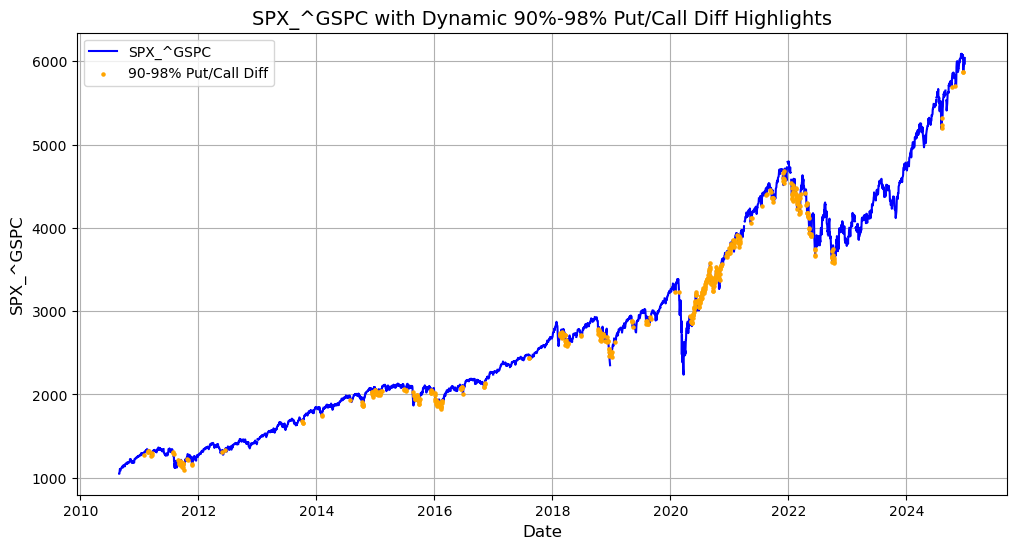

In [80]:
# Plot the entire 'SPX_^GSPC' data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')

# Highlight points between the 90th and 95th percentiles
highlight_90_95 = df[df['Highlight_90_98_Diff']]
plt.scatter(
    highlight_90_95['Date'], 
    highlight_90_95['SPX_^GSPC'], 
    color='orange', 
    label='90-98% Put/Call Diff', 
    zorder=5, 
    s=5
)

# Add labels, title, and legend
plt.title('SPX_^GSPC with Dynamic 90%-98% Put/Call Diff Highlights', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

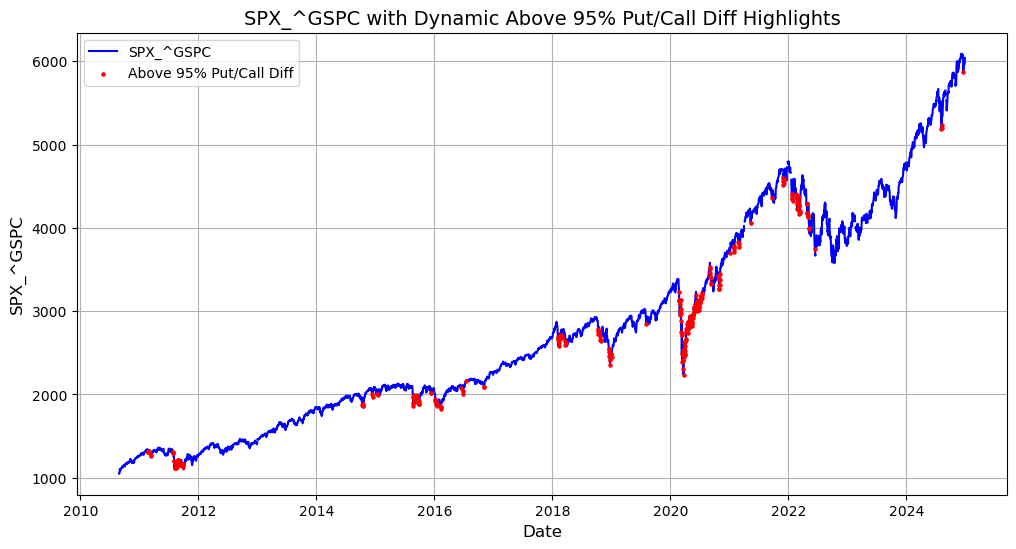

In [81]:
# Plot 2: Highlight points above the 95th percentile
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')
highlight_above95 = df[df['Highlight_Diff']]
plt.scatter(
    highlight_above95['Date'], 
    highlight_above95['SPX_^GSPC'], 
    color='red', 
    label='Above 95% Put/Call Diff', 
    zorder=5, 
    s=5
)
plt.title('SPX_^GSPC with Dynamic Above 95% Put/Call Diff Highlights', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## Dynamic Moving Average

### VIX

In [202]:
df = merged_df.copy()

# Calculate the 6-month moving average for 'VIX_yfinance_^VIX'
df['VIX_MA_6M'] = df['VIX_yfinance_^VIX'].rolling(window=2520, min_periods=1).mean()  # Assuming 21 trading days per month

# Initialize an empty column for the dynamic 95th percentile
df['Dynamic95Percentile'] = np.nan

# Calculate the cumulative 95th percentile for each row and exclude outliers dynamically
excluded_indices = set()  # To track excluded rows
for i in range(100, len(df)):  # Start from the 500th row as base data
    # Filter rows not excluded so far
    valid_rows = df.loc[:i].drop(index=excluded_indices)
    
    if valid_rows['VIX_yfinance_^VIX'].notna().any():  # Check if there are non-NaN values
        # Calculate the 95th percentile
        percentile_95 = valid_rows['VIX_yfinance_^VIX'].quantile(0.95)
        df.loc[i, 'Dynamic95Percentile'] = percentile_95

        # Check if the current row's VIX is an outlier
        current_vix = df.loc[i, 'VIX_yfinance_^VIX']
        current_ma = df.loc[i, 'VIX_MA_6M']
        
        if current_vix > percentile_95 and current_vix > (1 * current_ma):  # 20% above the moving average
            excluded_indices.add(i)  # Exclude this row from future calculations

# Highlight points above the adjusted 95th percentile
df['Highlight_Above95_Adjusted'] = df['VIX_yfinance_^VIX'] > df['Dynamic95Percentile']

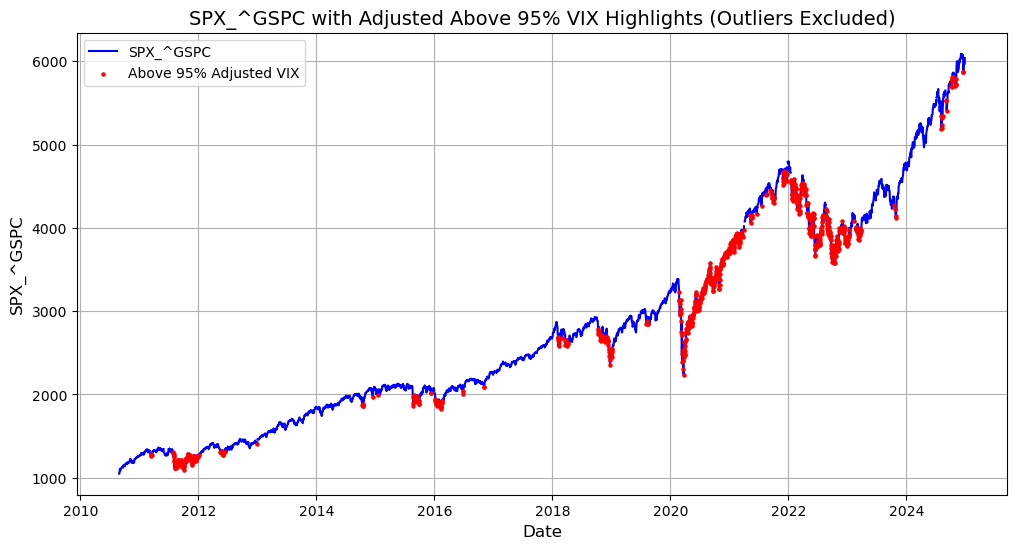

In [203]:
# Plot the entire 'SPX_^GSPC' data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')

# Highlight points above the adjusted 95th percentile
highlight_above95_adjusted = df[df['Highlight_Above95_Adjusted']]
plt.scatter(
    highlight_above95_adjusted['Date'], 
    highlight_above95_adjusted['SPX_^GSPC'], 
    color='red', 
    label='Above 95% Adjusted VIX', 
    zorder=5, 
    s=5
)

# Add labels, title, and legend
plt.title('SPX_^GSPC with Adjusted Above 95% VIX Highlights (Outliers Excluded)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### Calculated VIX

In [200]:
df = merged_df.copy()

# Calculate the 6-month moving average for 'VIX_yfinance_^VIX'
df['VIX_MA_6M'] = df['VIX'].rolling(window=2520, min_periods=1).mean()  # Assuming 21 trading days per month

# Initialize an empty column for the dynamic 95th percentile
df['Dynamic95Percentile'] = np.nan

# Calculate the cumulative 95th percentile for each row and exclude outliers dynamically
excluded_indices = set()  # To track excluded rows
for i in range(100, len(df)):  # Start from the 500th row as base data
    # Filter rows not excluded so far
    valid_rows = df.loc[:i].drop(index=excluded_indices)
    
    if valid_rows['VIX'].notna().any():  # Check if there are non-NaN values
        # Calculate the 95th percentile
        percentile_95 = valid_rows['VIX'].quantile(0.95)
        df.loc[i, 'Dynamic95Percentile'] = percentile_95

        # Check if the current row's VIX is an outlier
        current_vix = df.loc[i, 'VIX']
        current_ma = df.loc[i, 'VIX_MA_6M']
        
        if current_vix > percentile_95 and current_vix > (1.6 * current_ma):  # 20% above the moving average
            excluded_indices.add(i)  # Exclude this row from future calculations

# Highlight points above the adjusted 95th percentile
df['Highlight_Above95_Adjusted'] = df['VIX'] > df['Dynamic95Percentile']

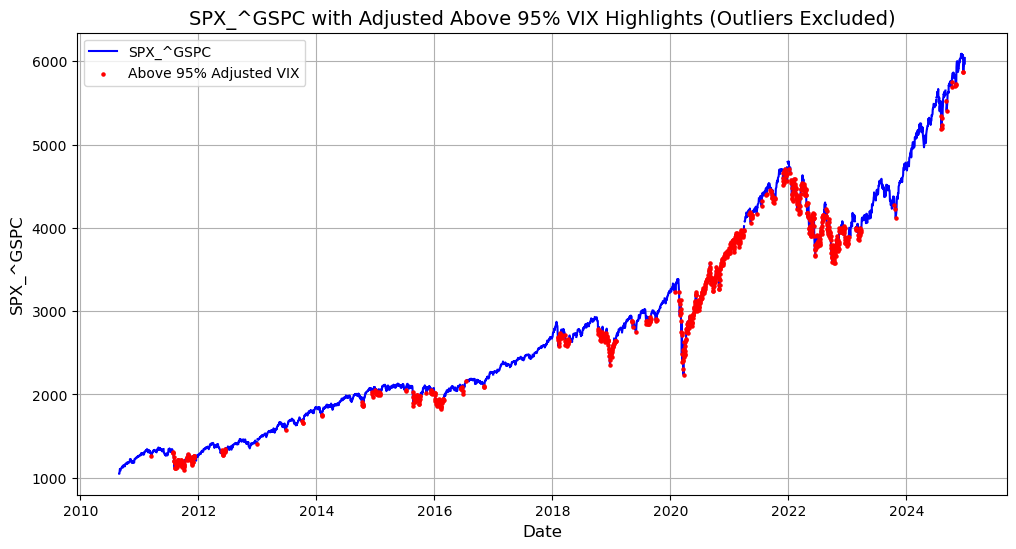

In [201]:
# Plot the entire 'SPX_^GSPC' data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')

# Highlight points above the adjusted 95th percentile
highlight_above95_adjusted = df[df['Highlight_Above95_Adjusted']]
plt.scatter(
    highlight_above95_adjusted['Date'], 
    highlight_above95_adjusted['SPX_^GSPC'], 
    color='red', 
    label='Above 95% Adjusted VIX', 
    zorder=5, 
    s=5
)

# Add labels, title, and legend
plt.title('SPX_^GSPC with Adjusted Above 95% VIX Highlights (Outliers Excluded)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### Call Contribution

In [204]:
df = merged_df.copy()

# Calculate the 6-month moving average for 'VIX_yfinance_^VIX'
df['Call_MA_6M'] = df['Call_contribution'].rolling(window=2520, min_periods=1).mean()  # Assuming 21 trading days per month

# Initialize an empty column for the dynamic 95th percentile
df['Dynamic95Percentile'] = np.nan

# Calculate the cumulative 95th percentile for each row and exclude outliers dynamically
excluded_indices = set()  # To track excluded rows
for i in range(100, len(df)):  # Start from the 500th row as base data
    # Filter rows not excluded so far
    valid_rows = df.loc[:i].drop(index=excluded_indices)
    
    if valid_rows['Call_contribution'].notna().any():  # Check if there are non-NaN values
        # Calculate the 95th percentile
        percentile_95 = valid_rows['Call_contribution'].quantile(0.95)
        df.loc[i, 'Dynamic95Percentile'] = percentile_95

        # Check if the current row's VIX is an outlier
        current_vix = df.loc[i, 'Call_contribution']
        current_ma = df.loc[i, 'Call_MA_6M']
        
        if current_vix > percentile_95 and current_vix > (1.6 * current_ma):  # 20% above the moving average
            excluded_indices.add(i)  # Exclude this row from future calculations

# Highlight points above the adjusted 95th percentile
df['Highlight_Above95_Adjusted'] = df['Call_contribution'] > df['Dynamic95Percentile']

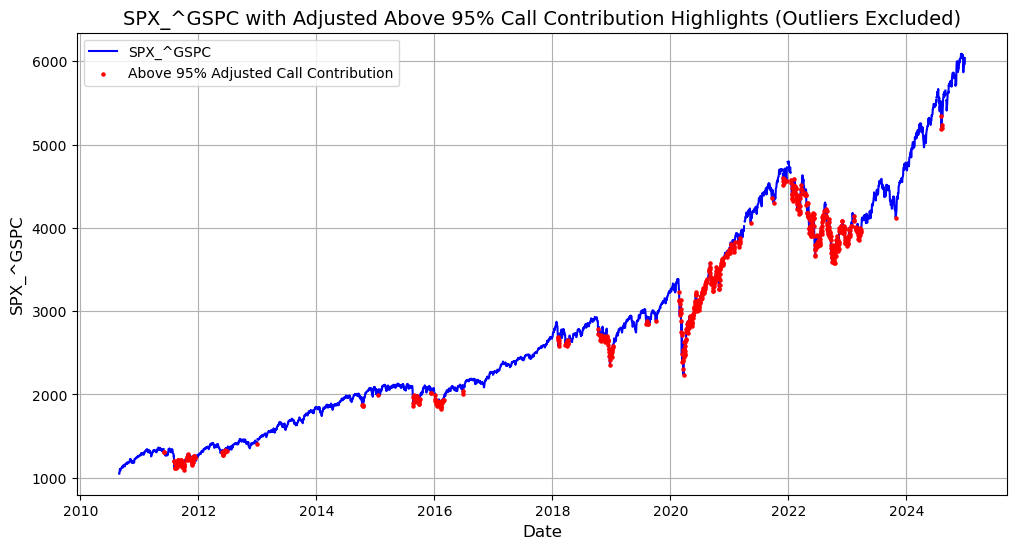

In [205]:
# Plot the entire 'SPX_^GSPC' data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')

# Highlight points above the adjusted 95th percentile
highlight_above95_adjusted = df[df['Highlight_Above95_Adjusted']]
plt.scatter(
    highlight_above95_adjusted['Date'], 
    highlight_above95_adjusted['SPX_^GSPC'], 
    color='red', 
    label='Above 95% Adjusted Call Contribution', 
    zorder=5, 
    s=5
)

# Add labels, title, and legend
plt.title('SPX_^GSPC with Adjusted Above 95% Call Contribution Highlights (Outliers Excluded)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### Put Contribution

In [206]:
df = merged_df.copy()

# Calculate the 6-month moving average for 'VIX_yfinance_^VIX'
df['Put_MA_6M'] = df['Put_contribution'].rolling(window=2520, min_periods=1).mean()  # Assuming 21 trading days per month

# Initialize an empty column for the dynamic 95th percentile
df['Dynamic95Percentile'] = np.nan

# Calculate the cumulative 95th percentile for each row and exclude outliers dynamically
excluded_indices = set()  # To track excluded rows
for i in range(100, len(df)):  # Start from the 500th row as base data
    # Filter rows not excluded so far
    valid_rows = df.loc[:i].drop(index=excluded_indices)
    
    if valid_rows['Put_contribution'].notna().any():  # Check if there are non-NaN values
        # Calculate the 95th percentile
        percentile_95 = valid_rows['Put_contribution'].quantile(0.95)
        df.loc[i, 'Dynamic95Percentile'] = percentile_95

        # Check if the current row's VIX is an outlier
        current_vix = df.loc[i, 'Put_contribution']
        current_ma = df.loc[i, 'Put_MA_6M']
        
        if current_vix > percentile_95 and current_vix > (1.6 * current_ma):  # 20% above the moving average
            excluded_indices.add(i)  # Exclude this row from future calculations

# Highlight points above the adjusted 95th percentile
df['Highlight_Above95_Adjusted'] = df['Put_contribution'] > df['Dynamic95Percentile']

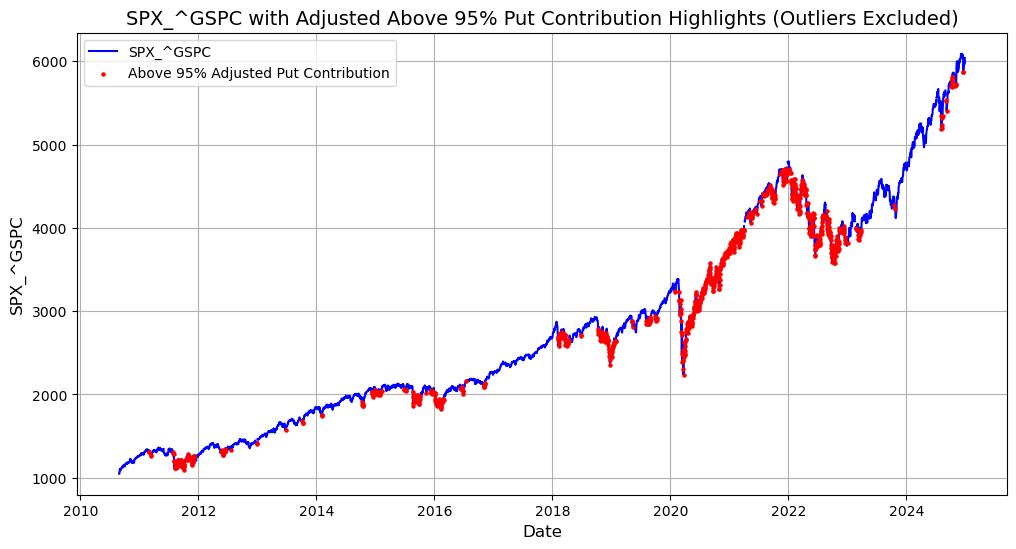

In [207]:
# Plot the entire 'SPX_^GSPC' data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')

# Highlight points above the adjusted 95th percentile
highlight_above95_adjusted = df[df['Highlight_Above95_Adjusted']]
plt.scatter(
    highlight_above95_adjusted['Date'], 
    highlight_above95_adjusted['SPX_^GSPC'], 
    color='red', 
    label='Above 95% Adjusted Put Contribution', 
    zorder=5, 
    s=5
)

# Add labels, title, and legend
plt.title('SPX_^GSPC with Adjusted Above 95% Put Contribution Highlights (Outliers Excluded)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### Put/Call Ratio

In [208]:
df = merged_df.copy()

# Calculate the 6-month moving average for 'VIX_yfinance_^VIX'
df['Ratio_MA_6M'] = df['Put_Call_Ratio'].rolling(window=2520, min_periods=1).mean()  # Assuming 21 trading days per month

# Initialize an empty column for the dynamic 95th percentile
df['Dynamic95Percentile'] = np.nan

# Calculate the cumulative 95th percentile for each row and exclude outliers dynamically
excluded_indices = set()  # To track excluded rows
for i in range(100, len(df)):  # Start from the 500th row as base data
    # Filter rows not excluded so far
    valid_rows = df.loc[:i].drop(index=excluded_indices)
    
    if valid_rows['Put_Call_Ratio'].notna().any():  # Check if there are non-NaN values
        # Calculate the 95th percentile
        percentile_95 = valid_rows['Put_Call_Ratio'].quantile(0.95)
        df.loc[i, 'Dynamic95Percentile'] = percentile_95

        # Check if the current row's VIX is an outlier
        current_vix = df.loc[i, 'Put_Call_Ratio']
        current_ma = df.loc[i, 'Ratio_MA_6M']
        
        if current_vix > percentile_95 and current_vix > (1.6 * current_ma):  # 20% above the moving average
            excluded_indices.add(i)  # Exclude this row from future calculations

# Highlight points above the adjusted 95th percentile
df['Highlight_Above95_Adjusted'] = df['Put_Call_Ratio'] > df['Dynamic95Percentile']

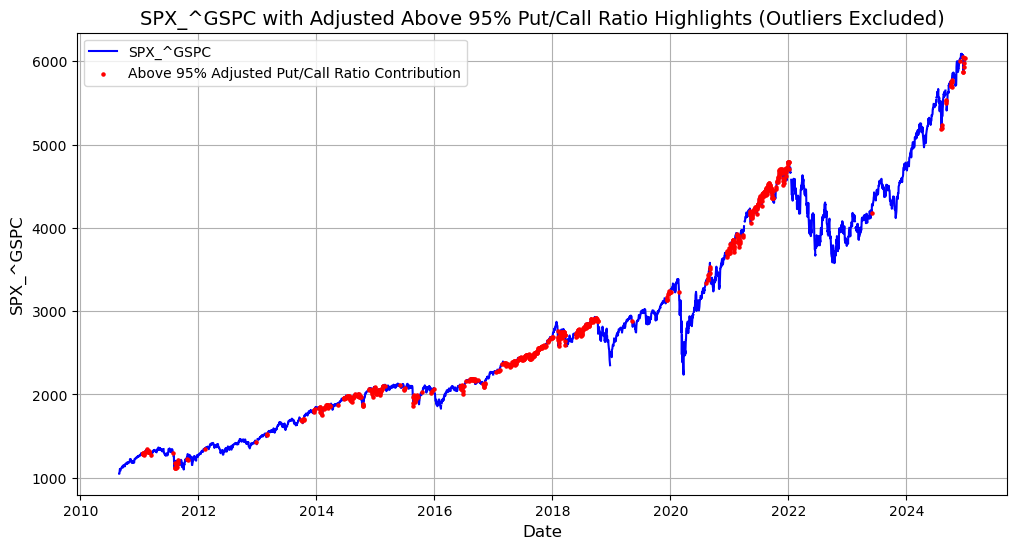

In [209]:
# Plot the entire 'SPX_^GSPC' data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')

# Highlight points above the adjusted 95th percentile
highlight_above95_adjusted = df[df['Highlight_Above95_Adjusted']]
plt.scatter(
    highlight_above95_adjusted['Date'], 
    highlight_above95_adjusted['SPX_^GSPC'], 
    color='red', 
    label='Above 95% Adjusted Put/Call Ratio Contribution', 
    zorder=5, 
    s=5
)

# Add labels, title, and legend
plt.title('SPX_^GSPC with Adjusted Above 95% Put/Call Ratio Highlights (Outliers Excluded)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### Put/Call Difference 

In [210]:
df = merged_df.copy()

# Calculate the 6-month moving average for 'VIX_yfinance_^VIX'
df['Diff_MA_6M'] = df['Put_Call_Diff'].rolling(window=2520, min_periods=1).mean()  # Assuming 21 trading days per month

# Initialize an empty column for the dynamic 95th percentile
df['Dynamic95Percentile'] = np.nan

# Calculate the cumulative 95th percentile for each row and exclude outliers dynamically
excluded_indices = set()  # To track excluded rows
for i in range(100, len(df)):  # Start from the 500th row as base data
    # Filter rows not excluded so far
    valid_rows = df.loc[:i].drop(index=excluded_indices)
    
    if valid_rows['Put_Call_Diff'].notna().any():  # Check if there are non-NaN values
        # Calculate the 95th percentile
        percentile_95 = valid_rows['Put_Call_Diff'].quantile(0.95)
        df.loc[i, 'Dynamic95Percentile'] = percentile_95

        # Check if the current row's VIX is an outlier
        current_vix = df.loc[i, 'Put_Call_Diff']
        current_ma = df.loc[i, 'Diff_MA_6M']
        
        if current_vix > percentile_95 and current_vix > (1.6 * current_ma):  # 20% above the moving average
            excluded_indices.add(i)  # Exclude this row from future calculations

# Highlight points above the adjusted 95th percentile
df['Highlight_Above95_Adjusted'] = df['Put_Call_Diff'] > df['Dynamic95Percentile']

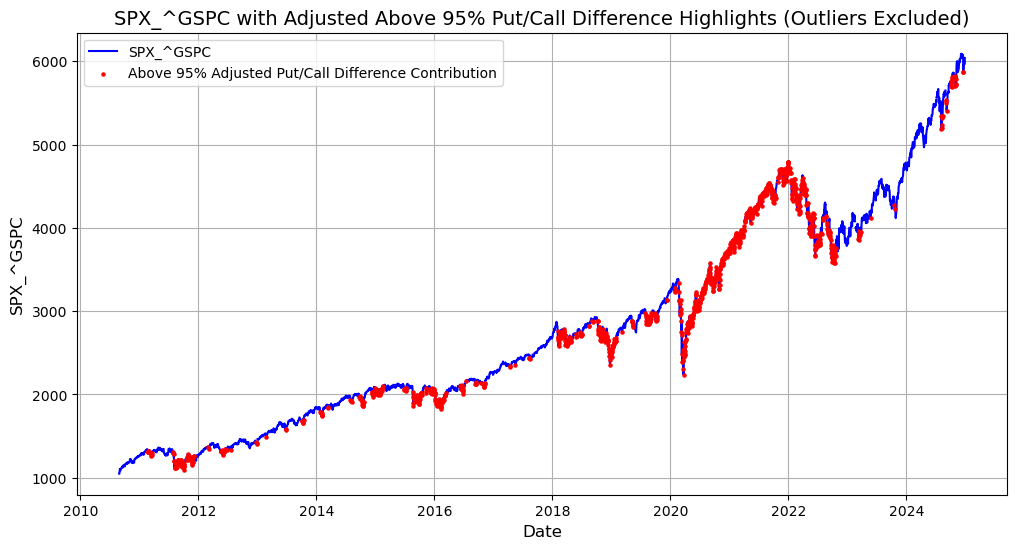

In [211]:
# Plot the entire 'SPX_^GSPC' data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')

# Highlight points above the adjusted 95th percentile
highlight_above95_adjusted = df[df['Highlight_Above95_Adjusted']]
plt.scatter(
    highlight_above95_adjusted['Date'], 
    highlight_above95_adjusted['SPX_^GSPC'], 
    color='red', 
    label='Above 95% Adjusted Put/Call Difference Contribution', 
    zorder=5, 
    s=5
)

# Add labels, title, and legend
plt.title('SPX_^GSPC with Adjusted Above 95% Put/Call Difference Highlights (Outliers Excluded)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

## Multi-Factor

### VIX

In [221]:
df = merged_df.copy()

# Calculate the 6-month moving average for 'VIX_yfinance_^VIX'
df['VIX_MA_6M'] = df['VIX_yfinance_^VIX'].rolling(window=2520, min_periods=1).mean()  # Assuming 21 trading days per month

# Initialize an empty column for the dynamic 95th percentile
df['Dynamic95Percentile'] = np.nan

# Calculate the cumulative 95th percentile for each row and exclude outliers dynamically
excluded_indices = set()  # To track excluded rows
for i in range(100, len(df)):  # Start from the 100th row as base data
    # Filter rows not excluded so far
    valid_rows = df.loc[:i].drop(index=excluded_indices)
    
    if valid_rows['VIX_yfinance_^VIX'].notna().any():  # Check if there are non-NaN values
        # Calculate the 95th percentile
        percentile_95 = valid_rows['VIX_yfinance_^VIX'].quantile(0.95)
        df.loc[i, 'Dynamic95Percentile'] = percentile_95

        # Check if the current row's VIX is an outlier
        current_vix = df.loc[i, 'VIX_yfinance_^VIX']
        current_ma = df.loc[i, 'VIX_MA_6M']
        
        if current_vix > percentile_95 and current_vix > (1 * current_ma):  # Outlier condition
            excluded_indices.add(i)  # Exclude this row from future calculations

# Highlight points above the adjusted 95th percentile
df['Highlight_Above95_Adjusted'] = df['VIX_yfinance_^VIX'] > df['Dynamic95Percentile']

# Perform filtering on the highlighted points
# Extract the subset of highlighted points
highlighted_points = df[df['Highlight_Above95_Adjusted']]

# Calculate the 5th percentile of 'Put_Call_Ratio' among the highlighted points
put_call_5th_percentile = highlighted_points['Put_Call_Diff'].quantile(0.30)

# Filter the highlighted points to keep only those in the lowest 5% of 'Put_Call_Ratio'
df['Highlight_Final'] = False
df.loc[highlighted_points.index, 'Highlight_Final'] = (
    highlighted_points['Put_Call_Diff'] <= put_call_5th_percentile
)


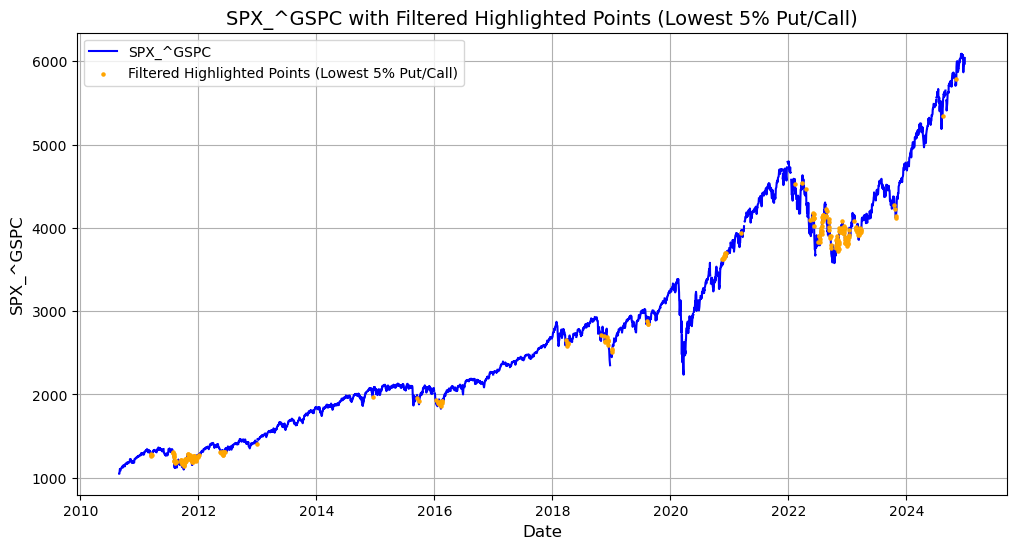

In [222]:
# Plot the entire 'SPX_^GSPC' data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')

# Highlight the final filtered points
highlight_final = df[df['Highlight_Final']]
plt.scatter(
    highlight_final['Date'], 
    highlight_final['SPX_^GSPC'], 
    color='orange', 
    label='Filtered Highlighted Points (Lowest 5% Put/Call)', 
    zorder=5, 
    s=5
)

# Add labels, title, and legend
plt.title('SPX_^GSPC with Filtered Highlighted Points (Lowest 5% Put/Call)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [227]:
df = merged_df.copy()

# Calculate the 6-month moving average for 'VIX_yfinance_^VIX'
df['VIX_MA_6M'] = df['VIX_yfinance_^VIX'].rolling(window=2520, min_periods=1).mean()  # Assuming 21 trading days per month

# Initialize an empty column for the dynamic 95th percentile
df['Dynamic95Percentile'] = np.nan

# Calculate the cumulative 95th percentile for each row and exclude outliers dynamically
excluded_indices = set()  # To track excluded rows
for i in range(100, len(df)):  # Start from the 100th row as base data
    # Filter rows not excluded so far
    valid_rows = df.loc[:i].drop(index=excluded_indices)
    
    if valid_rows['VIX_yfinance_^VIX'].notna().any():  # Check if there are non-NaN values
        # Calculate the 95th percentile
        percentile_95 = valid_rows['VIX_yfinance_^VIX'].quantile(0.95)
        df.loc[i, 'Dynamic95Percentile'] = percentile_95

        # Check if the current row's VIX is an outlier
        current_vix = df.loc[i, 'VIX_yfinance_^VIX']
        current_ma = df.loc[i, 'VIX_MA_6M']
        
        if current_vix > percentile_95 and current_vix > (1 * current_ma):  # Outlier condition
            excluded_indices.add(i)  # Exclude this row from future calculations

# Highlight points above the adjusted 95th percentile
df['Highlight_Above95_Adjusted'] = df['VIX_yfinance_^VIX'] > df['Dynamic95Percentile']

# Perform filtering on the highlighted points
# Extract the subset of highlighted points
highlighted_points = df[df['Highlight_Above95_Adjusted']]

# Calculate the 5th percentile of 'Put_Call_Ratio' among the highlighted points
put_call_5th_percentile = highlighted_points['Put_Call_Ratio'].quantile(0.40)

# Filter the highlighted points to keep only those in the lowest 5% of 'Put_Call_Ratio'
df['Highlight_Final'] = False
df.loc[highlighted_points.index, 'Highlight_Final'] = (
    highlighted_points['Put_Call_Ratio'] <= put_call_5th_percentile
)


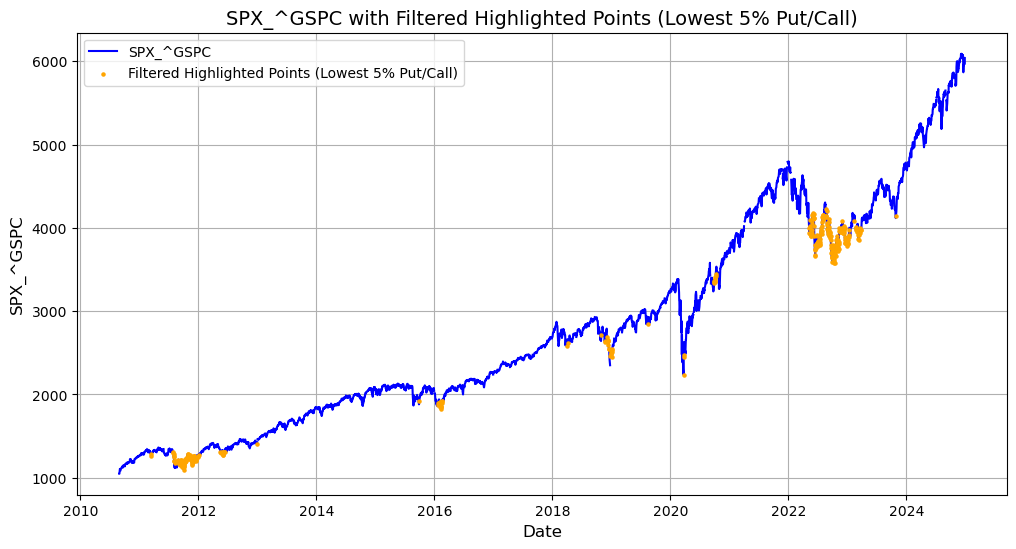

In [228]:
# Plot the entire 'SPX_^GSPC' data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['SPX_^GSPC'], label='SPX_^GSPC', color='blue')

# Highlight the final filtered points
highlight_final = df[df['Highlight_Final']]
plt.scatter(
    highlight_final['Date'], 
    highlight_final['SPX_^GSPC'], 
    color='orange', 
    label='Filtered Highlighted Points (Lowest 5% Put/Call)', 
    zorder=5, 
    s=5
)

# Add labels, title, and legend
plt.title('SPX_^GSPC with Filtered Highlighted Points (Lowest 5% Put/Call)', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('SPX_^GSPC', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

In [239]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)